In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [2]:
player_ids = pd.read_csv('../files/SFBB Player ID Map - PLAYERIDMAP.csv')
player_ids = player_ids[['MLBNAME', 'MLBID']].copy()
display([(i, player_ids[i].dtype) for i in player_ids.columns])
player_ids = player_ids.dropna(subset=['MLBID']).copy()
player_ids['MLBID'] = player_ids['MLBID'].astype('int64')
display([(i, player_ids[i].dtype) for i in player_ids.columns])
batter_names = player_ids.drop_duplicates(subset='MLBID').set_index('MLBID')['MLBNAME']

[('MLBNAME', dtype('O')), ('MLBID', dtype('float64'))]

[('MLBNAME', dtype('O')), ('MLBID', dtype('int64'))]

In [3]:
savant_2024 = pd.read_csv('../files/2024/savantdata-2024.csv')

In [4]:
savant_2024['batter_name'] = savant_2024['batter'].map(batter_names)
print("Missing names:", savant_2024['batter_name'].isna().sum())
print("Total rows:", len(savant_2024))

Missing names: 5057
Total rows: 721611


In [5]:
display(savant_2024.shape)
display(savant_2024.head())

(721611, 119)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,batter_name
0,FF,2024-09-30,97.4,-2.10,4.88,"Díaz, Edwin",518595,621242,field_out,hit_into_play,NaN,NaN,NaN,NaN,3.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,X,6.0,ground_ball,2,2,2024,-0.96,0.99,0.67,3.00,NaN,642201.0,NaN,2,9,Bot,112.78,146.97,NaN,NaN,NaN,NaN,9.893410,-141.548522,-1.857108,-15.148286,30.423852,-18.544662,3.43,1.54,5.0,87.6,-30.0,99.9,2196.0,7.6,747139,682626,624413,657193,578428,596019,607043,621438,516782,52.91,0.049,0.052,0.0,1.0,0.0,0.0,2.0,82,5,4-Seam Fastball,7,8,7,8,8,7,7,8,Standard,Strategic,232.0,-0.142,-0.248,68.8,7.3,0.059,0.248,88.0,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,1.40,0.96,0.96,17.6,6.149605,12.090516,22.160400,45.805662,22.048373,Travis d'Arnaud
1,SL,2024-09-30,90.7,-2.14,5.06,"Díaz, Edwin",518595,621242,NaN,ball,NaN,NaN,NaN,NaN,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,1,2,2024,0.20,0.61,0.75,1.20,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.952856,-131.970548,-5.159843,1.012613,25.103830,-24.224355,3.47,1.52,NaN,NaN,NaN,92.9,2209.0,7.3,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,201.0,0.000,0.037,NaN,NaN,NaN,-0.037,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.14,-0.20,-0.20,23.1,NaN,NaN,NaN,NaN,NaN,Travis d'Arnaud
2,SL,2024-09-30,91.1,-2.07,5.14,"Díaz, Edwin",518595,621242,NaN,swinging_strike,NaN,NaN,NaN,NaN,9.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,S,NaN,NaN,1,1,2024,0.12,0.35,0.66,1.61,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.757602,-132.670539,-3.857177,0.114032,25.108326,-27.443443,3.43,1.54,NaN,NaN,NaN,93.5,2302.0,7.4,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,3,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,210.0,0.000,-0.060,71.2,8.9,NaN,0.060,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.37,-0.12,-0.12,22.4,23.541699,-27.093819,34.778701,45.227965,45.368412,Travis d'Arnaud
3,SL,2024-09-30,91.3,-2.05,5.07,"Díaz, Edwin",518595,621242,NaN,ball,NaN,NaN,NaN,NaN,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,0,1,2024,0.21,0.63,0.61,1.18,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.385514,-132.826939,-5.397765,1.181254,26.329685,-23.817729,3.47,1.54,NaN,NaN,NaN,93.5,2227.0,7.4,747139,682626,624413,657193,578428,596019,60

In [6]:
display(savant_2024.columns[savant_2024.isna().sum() / len(savant_2024) >= 0.9])
old_system_cols = ['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire']

savant_2024 = savant_2024.drop(columns = old_system_cols).copy()
savant_2024 = savant_2024.dropna(axis=0, subset=['pitch_type', 'zone']).copy()

Index(['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated',
       'break_length_deprecated', 'on_3b', 'tfs_deprecated',
       'tfs_zulu_deprecated', 'umpire', 'sv_id'],
      dtype='object')

In [7]:
savant_2024.loc[:, 'batter_name'] = savant_2024['batter'].map(batter_names).astype('object')
savant_2024['batter_name']

0          Travis d'Arnaud
1          Travis d'Arnaud
2          Travis d'Arnaud
3          Travis d'Arnaud
4          Travis d'Arnaud
                ...       
721606       Brenton Doyle
721607      Ezequiel Tovar
721608      Ezequiel Tovar
721609      Ezequiel Tovar
721610    Charlie Blackmon
Name: batter_name, Length: 721327, dtype: object

In [8]:
savant_2024.loc[:, 'batter_name'] = savant_2024['batter_name'].fillna('Unknown Batter')

In [9]:
batter_cols = ["batter", "batter_name", "game_date", "pitch_type", "player_name", "des", "batter", "stand", "p_throws", 
               "release_speed", "pfx_x", "pfx_z", "plate_x", "plate_z", 
               "attack_angle", "launch_angle", "launch_speed", "bat_speed", "swing_path_tilt", 
               "attack_direction", "intercept_ball_minus_batter_pos_x_inches", "intercept_ball_minus_batter_pos_y_inches", 
               "events", "description", "zone", "hit_location", "bb_type", "balls", "strikes", "outs_when_up", 
               "hc_x", "hc_y", "sz_top", "sz_bot", "hit_distance_sc", 
               "estimated_ba_using_speedangle", "estimated_woba_using_speedangle", "woba_value", "woba_denom", "babip_value", "iso_value",
               "launch_speed_angle", "at_bat_number", "delta_run_exp", "swing_length", "estimated_slg_using_speedangle", "age_bat", 
               "if_fielding_alignment", "of_fielding_alignment",
               "n_thruorder_pitcher"
               ]

batter_data = savant_2024[batter_cols].copy()

In [10]:
mask = ((batter_data["balls"] == 0) & (batter_data["strikes"] == 0))
filtered = batter_data[mask]
qualified = filtered.groupby("batter_name").count()
qualified = qualified[qualified["pitch_type"] >= (502)]
qualified_batters = qualified.index.to_list()
qualified_df = batter_data[batter_data["batter_name"].isin(qualified_batters)].reset_index(drop=True).copy()
qualified_df = qualified_df[qualified_df['batter_name'] != 'Unknown Batter'].copy()

In [11]:
foul_plays = ['foul', 'foul_bunt', 'foul_tip', 'bunt_foul_tip']
zone_list = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0]
contact_plays = foul_plays + ['hit_into_play']
swing_plays = ['hit_into_play', 'swinging_strike', 'foul', 'swinging_strike_blocked', 'foul_bunt', 'foul_tip', 'bunt_foul_tip', 'missed_bunt']

qualified_df.loc[:, "is_foul"] = (qualified_df["description"].isin(foul_plays)).astype(int)
qualified_df.loc[:, "is_contact"] = (qualified_df["description"].isin(foul_plays + ['hit_into_play'])).astype(int)
qualified_df.loc[:, "is_whiff"] = (qualified_df["description"].isin(["swinging_strike_blocked", "swinging_strike"])).astype(int)
qualified_df.loc[:, 'is_inzone'] = (qualified_df['zone'].isin(zone_list)).astype(int)
qualified_df.loc[:, 'is_inplay'] = (qualified_df['description'] == 'hit_into_play').astype(int)
qualified_df.loc[:, "is_single"] = (qualified_df["events"] == "single").astype(int)
qualified_df.loc[:, "is_double"] = (qualified_df["events"] == "double").astype(int)
qualified_df.loc[:, "is_triple"] = (qualified_df["events"] == "triple").astype(int)
qualified_df.loc[:, "is_hr"] = (qualified_df["events"] == "home_run").astype(int)
qualified_df.loc[:, "is_bb"] = (qualified_df["events"] == "walk").astype(int)
qualified_df.loc[:, "is_K"] = (qualified_df["events"].isin(['strikeout', 'strikeout_double_play'])).astype(int)
qualified_df.loc[:, "is_hbp"] = (qualified_df["events"] == "hit_by_pitch").astype(int)
qualified_df.loc[:, "is_sf"] = (qualified_df["events"].isin(["sac_fly", "sac_fly_double_play"])).astype(int)
qualified_df.loc[:, "is_sacbunt"] = (qualified_df["events"] == "sac_bunt").astype(int)
qualified_df.loc[:, "is_catch_inf"] = (qualified_df["events"] == "catcher_interf").astype(int)
qualified_df.loc[:, "is_truncated"] = (qualified_df["events"] == "truncated_pa").astype(int)
qualified_df.loc[:, 'PA_id'] = (qualified_df['game_date'].astype(str) + '_' + qualified_df['at_bat_number'].astype(str))
qualified_df.loc[:, 'name_with_stand'] = qualified_df["batter_name"] + qualified_df["stand"]
qualified_df.loc[:, 'dir_sign'] = qualified_df['stand'].map({'R': 1, 'L': -1})
qualified_df.loc[:, 'attack_direction'] = qualified_df['attack_direction'] * qualified_df['dir_sign']
qualified_df.loc[:, 'is_swing'] = (qualified_df['description'].isin(swing_plays)).astype(int)
qualified_df.loc[:, 'is_zone_swing'] = ((qualified_df['is_inzone'] == 1) & (qualified_df['is_swing']==1)).astype(int)
qualified_df.loc[:, 'chase_swing'] = ((qualified_df['is_inzone'] == 0) & (qualified_df['is_swing']==1)).astype(int)
qualified_df.loc[:, 'is_gb'] = (qualified_df['bb_type'] == 'ground_ball').astype(int)
qualified_df.loc[:, 'is_oppo'] = qualified_df.apply(lambda x: 1 if (x['stand'] == 'R' and x['hit_location'] == 9) or (x['stand'] == 'L' and x['hit_location'] == 7) else 0, axis=1)

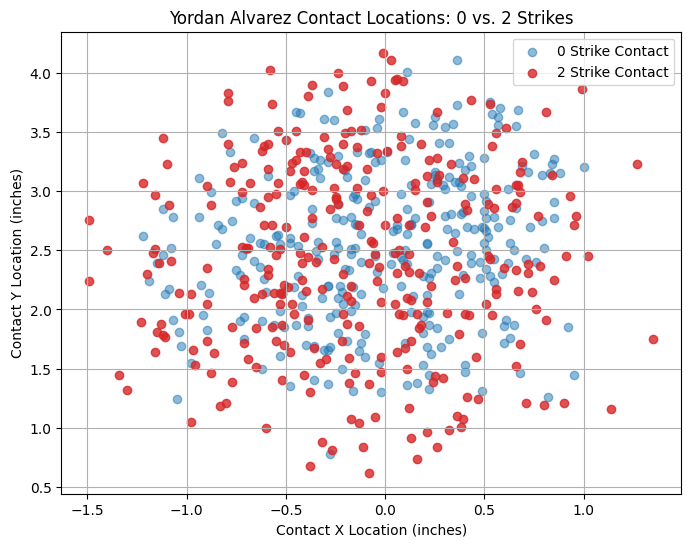

In [61]:
Alvarez_df = qualified_df[qualified_df["batter_name"] =="Yordan Alvarez"]

two_strike_contacts = Alvarez_df[
    Alvarez_df["is_contact"] == 1
]

contacts_0_1 = Alvarez_df[
    (Alvarez_df["strikes"] < 1) &
    (Alvarez_df["is_contact"] == 1)
]
contacts_2 = Alvarez_df[
    (Alvarez_df["strikes"] == 2) &
    (Alvarez_df["is_contact"] == 1)
]

# 3) Extract the X/Y coordinates of contact
x0_1 = contacts_0_1["plate_x"]
y0_1 = contacts_0_1["plate_z"]

x2 = contacts_2["plate_x"]
y2 = contacts_2["plate_z"]

# 4) Plot both on the same figure, in different colors
plt.figure(figsize=(8, 6))
plt.scatter(x0_1, y0_1, alpha=0.5, label="0 Strike Contact", color="C0")
plt.scatter(x2,   y2,   alpha=0.8, label="2 Strike Contact",   color="C3")

plt.xlabel("Contact X Location (inches)")
plt.ylabel("Contact Y Location (inches)")
plt.title("Yordan Alvarez Contact Locations: 0 vs. 2 Strikes")
plt.legend()
plt.grid(True)
plt.show()


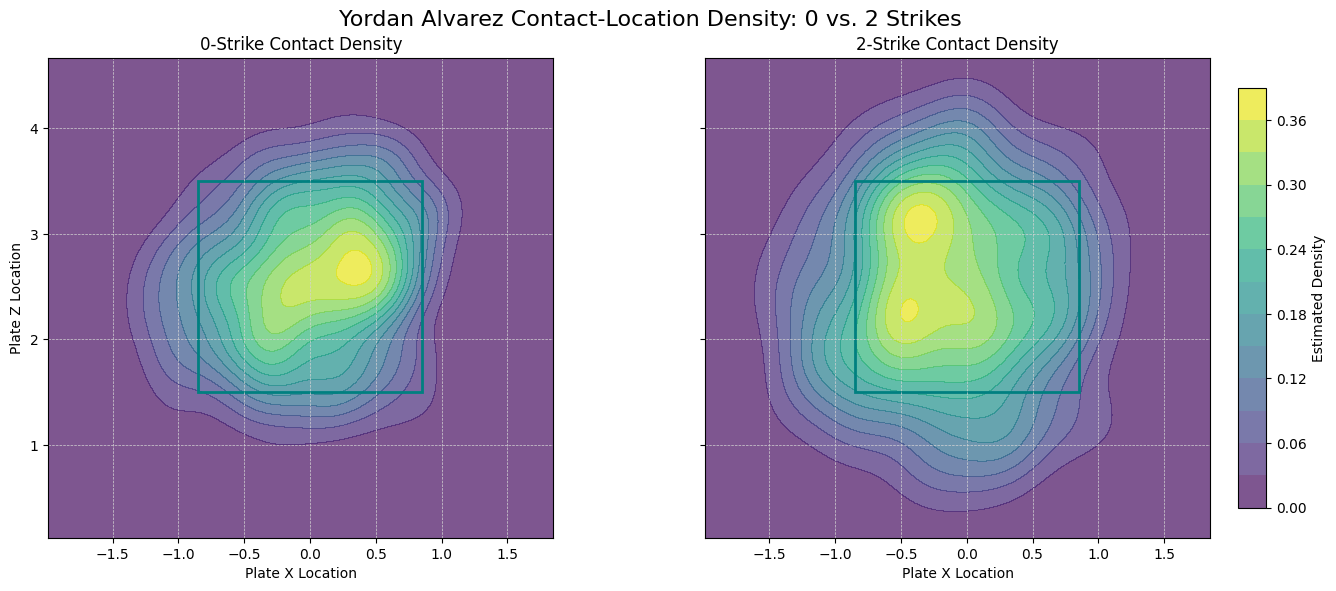

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.patches import Rectangle

# ────────────────────────────────────────────────────────────────────────────────
# 1) SELECT YOUR PLAYER AND FILTER FOR CONTACTS
#    -------------------------------------------------------------------
player_name = "Yordan Alvarez"
df = qualified_df[qualified_df["batter_name"] == player_name].copy()

# Keep only rows where contact was made (is_contact == 1)
# We’ll split this into 0-strike and 2-strike subsets next.
df = df[df["is_contact"] == 1]

# 2) SPLIT INTO 0-STRIKE VS 2-STRIKE CONTACTS
#    -------------------------------------------------------------------
contacts_0 = df[df["strikes"] < 1]  # all contacts at 0 strikes
contacts_2 = df[df["strikes"] == 2]  # all contacts at 2 strikes

# If you want “0 vs. 2” exactly, you can use strikes == 0. 
# But typically “0-strike” means strikes < 1 (i.e. exactly 0).
# Adjust if you want to exclude 1-strike hits (e.g. use strikes <= 1).

# 3) PULL OUT (plate_x, plate_z) COORDINATES FOR EACH GROUP
#    -------------------------------------------------------------------
x0, y0 = contacts_0["plate_x"].values, contacts_0["plate_z"].values
x2, y2 = contacts_2["plate_x"].values, contacts_2["plate_z"].values

# 4) BUILD A COMMON GRID FOR KDE EVALUATION
#    -------------------------------------------------------------------
# We want to cover the full range of contact points among both groups.
all_x = np.concatenate([x0, x2])
all_y = np.concatenate([y0, y2])

padding = 0.5  # add half‐unit margin around extremes
xmin = np.min(all_x) - padding
xmax = np.max(all_x) + padding
ymin = np.min(all_y) - padding
ymax = np.max(all_y) + padding

# Create a 200×200 grid over [xmin, xmax] × [ymin, ymax]
X, Y = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
grid_positions = np.vstack([X.ravel(), Y.ravel()])

# 5) COMPUTE KDE FOR “0-STRIKE CONTACTS”
#    -------------------------------------------------------------------
values0 = np.vstack([x0, y0])
kde0 = gaussian_kde(values0)

# Evaluate on the grid:
Z0 = np.reshape(kde0(grid_positions).T, X.shape)

# 6) COMPUTE KDE FOR “2-STRIKE CONTACTS”
#    -------------------------------------------------------------------
values2 = np.vstack([x2, y2])
kde2 = gaussian_kde(values2)

# Evaluate on the same grid:
Z2 = np.reshape(kde2(grid_positions).T, X.shape)

# 7) CHOOSE A STRIKE-ZONE RECTANGLE TO OVERLAY (OPTIONAL)
#    -------------------------------------------------------------------
# Here we draw a “generic” default zone (width ≈ 17” by height ≈ [1.5ft,3.5ft]).
# If plate_x/plate_z are feet, use feet. If they are inches, convert accordingly.
# These numbers assume feet:

zone_left   = -0.85   # ~–10 inches (i.e. 10” outside center)
zone_right  = +0.85   # ~+10 inches
zone_bottom =  1.5    # ~ 18 inches above ground
zone_top    =  3.5    # ~ 42 inches

# If your coordinates are in inches, you might pick:
# zone_left = -10, zone_right = 10, zone_bottom = 18, zone_top = 42, etc.

# 8) PLOT SIDE-BY-SIDE FILLED CONTOUR “HEATMAPS”
#    -------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

cmap = "viridis"
levels = 12  # number of contour levels

# Left panel: 0-strike contacts
ax = axes[0]
cf0 = ax.contourf(
    X, Y, Z0,
    levels=levels,
    cmap=cmap,
    alpha=0.7
)
ax.set_title("0-Strike Contact Density")
ax.set_xlabel("Plate X Location")
ax.set_ylabel("Plate Z Location")
ax.grid(color="lightgray", linestyle="--", linewidth=0.5)

# Overlay strike-zone rectangle
rect0 = Rectangle(
    (zone_left, zone_bottom),
    zone_right - zone_left,
    zone_top - zone_bottom,
    fill=False, edgecolor="teal", linewidth=2
)
ax.add_patch(rect0)

# Right panel: 2-strike contacts
ax = axes[1]
cf2 = ax.contourf(
    X, Y, Z2,
    levels=levels,
    cmap=cmap,
    alpha=0.7
)
ax.set_title("2-Strike Contact Density")
ax.set_xlabel("Plate X Location")
# Note: we share the y-label, so no need to call set_ylabel again
ax.grid(color="lightgray", linestyle="--", linewidth=0.5)

# Overlay same strike-zone rectangle
rect2 = Rectangle(
    (zone_left, zone_bottom),
    zone_right - zone_left,
    zone_top - zone_bottom,
    fill=False, edgecolor="teal", linewidth=2
)
ax.add_patch(rect2)

# 9) ADJUST AXES LIMITS TO BE THE SAME ON BOTH PANELS
#    -------------------------------------------------------------------
for ax in axes:
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# 10) ADD A SHARED COLORBAR
#     -------------------------------------------------------------------
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(cf0, cax=cbar_ax, label="Estimated Density")

# 11) FINAL LAYOUT TWEAKS & SHOW
#     -------------------------------------------------------------------
plt.subplots_adjust(left=0.07, right=0.9, top=0.9, bottom=0.1, wspace=0.3)
plt.suptitle(f"{player_name} Contact‐Location Density: 0 vs. 2 Strikes", y=0.98, fontsize=16)
plt.show()


In [12]:
test = (
    qualified_df[qualified_df["strikes"] == 2]
    .groupby("batter_name")["PA_id"]
    .unique()
    .reset_index()
)

# Each row of test["PA_id"] is a NumPy array of unique PA_id’s.
# To get its length, do:
test["PA_id"] = test["PA_id"].apply(len)
test
two_strike_pitches = (
    qualified_df[qualified_df["strikes"] == 2]
    .groupby(["batter_name", "stand"])
    .size()
    .rename("num_pitches_with_two_strikes")
)
two_strike_pitches = two_strike_pitches.reset_index()
combo = two_strike_pitches.merge(test, on ="batter_name", how = "left")
combo["emp_num_pitches_with_two_strikes"] = (combo["num_pitches_with_two_strikes"] - combo["PA_id"]) /combo["PA_id"]
combo.sort_values(by = "emp_num_pitches_with_two_strikes")

,batter_name,stand,num_pitches_with_two_strikes,PA_id,emp_num_pitches_with_two_strikes
92,Leody Taveras,R,104,269,-0.613383
48,Francisco Lindor,R,158,387,-0.591731
31,Carlos Santana,R,159,308,-0.483766
139,Willi Castro,R,187,359,-0.479109
57,Ian Happ,R,201,372,-0.459677
...,...,...,...,...,...
133,Ty France,R,654,268,1.440299
117,Rafael Devers,L,757,310,1.441935
104,Matt Olson,L,1019,412,1.473301
58,Isaac Paredes,R,980,389,1.519280


In [13]:
two_strike_pitches.sort_values(by ="num_pitches_with_two_strikes", ascending=False).head(30)

,batter_name,stand,num_pitches_with_two_strikes
53,Gleyber Torres,R,1020
104,Matt Olson,L,1019
58,Isaac Paredes,R,980
0,Aaron Judge,R,939
14,Anthony Volpe,R,931
115,Paul Goldschmidt,R,920
16,Brandon Nimmo,L,919
99,Marcell Ozuna,R,912
118,Randy Arozarena,R,908
121,Ryan McMahon,L,903


In [14]:
def player_ABs(df: pd.DataFrame) -> pd.DataFrame:
    excluded_stats_list = ['is_bb', 'is_sf', 'is_sacbunt', 'is_hbp', 'is_catch_inf', 'is_truncated']

    df = df.copy()
    unique_pas = df.drop_duplicates(subset=['name_with_stand', 'PA_id'])
    pa_counts = (unique_pas.groupby('name_with_stand').size().reset_index(name = 'PAs'))

    atbats_excluded = df.groupby(['name_with_stand'])[excluded_stats_list].sum().reset_index().copy()

    counting_atbats = pa_counts.merge(atbats_excluded, on = 'name_with_stand', how = 'left').copy()
    counting_atbats[excluded_stats_list] = counting_atbats[excluded_stats_list].fillna(0)

    counting_atbats.loc[:, 'ABs'] = counting_atbats['PAs'] - (counting_atbats[excluded_stats_list].sum(axis=1))

    pitch_counts = df.groupby('name_with_stand')['release_speed'].size().reset_index().copy()
    pitch_counts.loc[:, 'pitch_count'] = pitch_counts["release_speed"]
    pitch_counts = pitch_counts.drop(columns=["release_speed"]).copy()

    pitches_per_PA = counting_atbats.merge(pitch_counts, on = 'name_with_stand', how = 'inner').copy()
    pitches_per_PA.loc[:, 'pitches_per_PA'] = pitches_per_PA['pitch_count'] / pitches_per_PA['PAs']
    pitches_per_PA = pitches_per_PA.sort_values(by = 'pitches_per_PA', ascending = False).reset_index(drop=True)

    return pitches_per_PA

In [15]:
def wOBA(singles, doubles, triples, HRs, BBs, HBPs, SFs, ABs) -> float:
    weights = {"wBB": 0.689,
               "wHBP": 0.720,
               "w1B": 0.882,
               "w2B": 1.254,
               "w3B": 1.590,
               "wHR": 2.050
               }
    
    woba_numerator = (weights["wBB"]*BBs + weights["wHBP"]*HBPs + weights["w1B"]*singles + weights["w2B"]*doubles + weights["w3B"]*triples + weights["wHR"]*HRs)
    woba_denominator = (ABs + BBs + SFs + HBPs)
    return (woba_numerator/woba_denominator)

In [16]:
zero_strike_counts = qualified_df[qualified_df["strikes"]==0].copy()

In [17]:
two_strike_counts = qualified_df[qualified_df["strikes"] == 2].copy()

In [18]:
def merge_for_woba(df: pd.DataFrame) -> pd.DataFrame:
    hits_list = ["is_single", "is_double", "is_triple", "is_hr"]

    ABs = player_ABs(df).copy()
    player_stats = df.groupby('name_with_stand')[hits_list].sum().reset_index().copy()
    woba_stats = player_stats.merge(ABs, on='name_with_stand', how='inner').copy()
    woba_stats = woba_stats.drop(columns=['PAs', 'is_sacbunt', 'is_catch_inf', 'is_truncated', 'pitch_count', 'pitches_per_PA'])
    woba_stats.loc[:, 'wOBA'] = woba_stats.apply(lambda x: wOBA(x['is_single'], x['is_double'], x['is_triple'], x['is_hr'], x['is_bb'], x['is_hbp'], x['is_sf'], x['ABs']), axis=1)
    woba_stats = woba_stats.sort_values(by='wOBA', ascending=False)
    return woba_stats

In [19]:
def percentile(df: pd.DataFrame, col: str) -> pd.DataFrame:
    df = df.copy()
    df.loc[:, f'{col}_percentile'] = (df[col].rank(method='average', pct=True) * 100)
    return df

In [20]:
two_K_woba = merge_for_woba(two_strike_counts)
two_K_woba.loc[:, "wOBA_2str_pctile"] = (two_K_woba["wOBA"].rank(method="average", pct=True) * 100)
two_K_woba

,name_with_stand,is_single,is_double,is_triple,is_hr,is_bb,is_sf,is_hbp,ABs,wOBA,wOBA_2str_pctile
76,Jose RamirezL,34,16,1,18,18,2,1,257,0.365698,100.000000
77,Jose RamirezR,16,7,0,4,3,3,0,88,0.352734,99.324324
0,Aaron JudgeR,28,14,0,24,65,2,3,335,0.341721,98.648649
87,Ketel MarteL,18,6,1,7,26,1,2,145,0.337322,97.972973
136,Vladimir Guerrero Jr.R,53,16,1,8,34,1,1,300,0.324244,97.297297
...,...,...,...,...,...,...,...,...,...,...,...
71,Jesus SanchezL,23,11,0,3,20,0,2,266,0.192535,3.378378
147,Zack GelofR,26,7,1,5,21,2,1,287,0.188871,2.702703
11,Andrew VaughnR,34,11,0,2,15,1,1,297,0.187697,2.027027
22,Bryan De La CruzR,38,8,0,4,14,3,2,331,0.179526,1.351351


In [21]:
def player_rates(df: pd.DataFrame):

    agg_cols = [
        'is_swing', 'is_inzone', 'is_whiff', 'is_contact', 'is_foul', 'is_zone_swing', 
        'is_inplay', 'is_oppo', 'is_gb'
    ]

    df = df.copy()
    grouped = df.groupby('name_with_stand')[agg_cols].sum().copy()
    grouped.loc[:, 'pitches_seen'] = df.groupby('name_with_stand').size()
    grouped.loc[:, 'swing%'] = grouped['is_swing'] / grouped['pitches_seen']
    grouped.loc[:, 'zone_swing%'] = grouped['is_zone_swing'] / grouped['is_swing']
    grouped.loc[:, 'chase%'] = 1 - grouped['zone_swing%']
    grouped.loc[:, 'contact%'] = grouped['is_contact'] / grouped['is_swing']
    grouped.loc[:, 'whiff%'] = 1 - grouped['contact%']
    grouped.loc[:, 'foul%'] = grouped['is_foul'] / grouped['is_swing']
    grouped.loc[:, 'in_play%'] = grouped['is_inplay'] / grouped['is_swing']
    grouped.loc[:, 'oppo%'] = grouped['is_oppo'] / grouped['is_inplay']
    grouped.loc[:, 'gb%'] = grouped['is_gb'] / grouped['is_inplay']

    return grouped.reset_index()

In [22]:
contact_2_str = player_rates(two_strike_counts).sort_values(by='contact%', ascending=False).merge(two_K_woba, on='name_with_stand', how='inner')
contact_2_str = contact_2_str[['name_with_stand', 'wOBA', 'wOBA_2str_pctile', 'pitches_seen', 'swing%', 'zone_swing%', 'chase%', 'contact%', 'whiff%', 'foul%', 'in_play%', 'oppo%', 'gb%']].copy()
contact_2_str

,name_with_stand,wOBA,wOBA_2str_pctile,pitches_seen,swing%,zone_swing%,chase%,contact%,whiff%,foul%,in_play%,oppo%,gb%
0,Luis ArraezL,0.281294,85.135135,647,0.761978,0.458418,0.541582,0.951318,0.048682,0.434077,0.517241,0.180392,0.474510
1,Steven KwanL,0.309650,94.594595,629,0.634340,0.551378,0.448622,0.922306,0.077694,0.443609,0.478697,0.225131,0.403141
2,Jurickson ProfarR,0.286989,88.513514,209,0.607656,0.606299,0.393701,0.921260,0.078740,0.401575,0.519685,0.166667,0.545455
3,Nico HoernerR,0.236863,35.135135,641,0.667707,0.492991,0.507009,0.899533,0.100467,0.411215,0.488318,0.148325,0.492823
4,Brendan DonovanL,0.278696,82.432432,713,0.587658,0.568019,0.431981,0.892601,0.107399,0.420048,0.472554,0.196970,0.464646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Kyle SchwarberL,0.237692,38.513514,858,0.540793,0.571121,0.428879,0.672414,0.327586,0.372845,0.299569,0.086331,0.460432
144,Elly De La CruzL,0.245091,46.621622,536,0.548507,0.547619,0.452381,0.670068,0.329932,0.350340,0.319728,0.148936,0.500000
145,Elly De La CruzR,0.201882,8.108108,245,0.604082,0.479730,0.520270,0.662162,0.337838,0.351351,0.310811,0.195652,0.586957
146,Logan O'HoppeR,0.201706,7.432432,636,0.567610,0.542936,0.457064,0.662050,0.337950,0.368421,0.293629,0.188679,0.330189


In [23]:
zero_strike_angles = zero_strike_counts.groupby('name_with_stand')[['attack_angle', 'attack_direction','swing_path_tilt']].mean().reset_index()
two_strike_angles = two_strike_counts.groupby('name_with_stand').agg({'attack_angle': 'var', 'attack_direction': 'var', 'swing_path_tilt': 'var'}).reset_index()

In [24]:
strike_angles = zero_strike_angles.merge(two_strike_angles, on='name_with_stand', how='inner')
delta_angles = strike_angles.copy()
delta_angles.loc[:, 'delta_attack_angle'] = delta_angles['attack_angle_x'] - delta_angles['attack_angle_y']
delta_angles.loc[:, 'delta_attack_direction'] = delta_angles['attack_direction_x'] - delta_angles['attack_direction_y']
delta_angles.loc[:, 'delta_swing_path_tilt'] = delta_angles['swing_path_tilt_x'] - delta_angles['swing_path_tilt_y']
delta_angles = delta_angles[['name_with_stand', 'delta_attack_angle', 'delta_attack_direction', 'delta_swing_path_tilt']].copy()
delta_angles

,name_with_stand,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt
0,Aaron JudgeR,-118.240042,-239.479007,16.540290
1,Adley RutschmanL,-114.172050,-334.795327,-15.558438
2,Adley RutschmanR,-130.157301,-260.900829,-8.683245
3,Adolis GarciaR,-76.337451,-442.132849,-10.942557
4,Alec BohmR,-72.542897,-274.046695,-2.646095
...,...,...,...,...
143,Yainer DiazR,-62.380221,-288.905050,-22.235680
144,Yandy DiazR,-43.639021,-259.189860,-5.397532
145,Yordan AlvarezL,-162.251236,-242.498311,-14.460727
146,Zach NetoR,-87.638134,-373.673152,-5.312251


In [27]:
combo

,batter_name,stand,num_pitches_with_two_strikes,PA_id,emp_num_pitches_with_two_strikes
0,Aaron Judge,R,939,405,1.318519
1,Adley Rutschman,L,561,357,0.571429
2,Adley Rutschman,R,217,357,-0.392157
3,Adolis Garcia,R,785,367,1.138965
4,Alec Bohm,R,559,252,1.218254
...,...,...,...,...,...
143,Yainer Diaz,R,621,279,1.225806
144,Yandy Diaz,R,675,296,1.280405
145,Yordan Alvarez,L,586,281,1.085409
146,Zach Neto,R,672,318,1.113208


In [34]:

combo["name_with_stand"] = combo['batter_name'] + combo["stand"]
pcik_guy = combo.merge(delta_angles, on = "name_with_stand").sort_values(by = "emp_num_pitches_with_two_strikes", ascending=False).drop(columns=["batter_name", "stand","num_pitches_with_two_strikes", "PA_id"])
pcik_guy[(pcik_guy['delta_attack_angle'] < 0) & (pcik_guy['delta_attack_direction'] < 0) & (pcik_guy['delta_swing_path_tilt'] < 0)].head(30)
df = pcik_guy.copy()

# 1b) Compute the 0.10‐quantile (10th percentile) for each delta column
pth_attack    = df['delta_attack_angle'].quantile(0.10)
pth_direction = df['delta_attack_direction'].quantile(0.10)
pth_tilt      = df['delta_swing_path_tilt'].quantile(0.10)

print("10th percentile of delta_attack_angle:   ", pth_attack)
print("10th percentile of delta_attack_direction:", pth_direction)
print("10th percentile of delta_swing_path_tilt:  ", pth_tilt)

bottom10_any = df[
    (df['delta_attack_angle']    <= pth_attack)    |
    (df['delta_attack_direction'] <= pth_direction) |
    (df['delta_swing_path_tilt']  <= pth_tilt)
].reset_index(drop=True)

bottom10_any.head(30)["name_with_stand"].to_list()


10th percentile of delta_attack_angle:    -144.48076973785655
10th percentile of delta_attack_direction: -439.4680110520621
10th percentile of delta_swing_path_tilt:   -22.384062358752608


['Freddie FreemanL',
 'Josh H. SmithL',
 'Matt ChapmanR',
 'Alex VerdugoL',
 'Jake CronenworthL',
 'Ryan McMahonL',
 'Riley GreeneL',
 'Brandon NimmoL',
 'Steven KwanL',
 'Gunnar HendersonL',
 'Nick CastellanosR',
 'Ryan MountcastleR',
 'Brent RookerR',
 'Luis ArraezL',
 'Jesus SanchezL',
 'Adolis GarciaR',
 'Bobby Witt Jr.R',
 'Nico HoernerR',
 'Alec BurlesonL',
 'Pete AlonsoR',
 'Andrew VaughnR',
 'Joey OrtizR',
 'Josh NaylorL',
 'Corbin CarrollL',
 'Yordan AlvarezL',
 'Oneil CruzL',
 'Colton CowserL',
 'Cody BellingerL',
 'Anthony SantanderL',
 'Cal RaleighL']

In [26]:
delta_angles[delta_angles["name_with_stand"] == "Matt OlsonL"]

,name_with_stand,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt
104,Matt OlsonL,-133.765227,-351.102755,-4.551556


In [ ]:
delta_angles[delta_angles["name_with_stand"] == "Gleyber TorresR"]

,name_with_stand,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt
53,Gleyber TorresR,-93.611371,-284.749734,10.154004


In [104]:
delta_angles[delta_angles["name_with_stand"] == "Steven KwanL"]

,name_with_stand,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt
129,Steven KwanL,-154.390752,-277.051563,-15.162698


In [111]:
delta_angles[delta_angles["name_with_stand"] == "Isaac ParedesR"]

,name_with_stand,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt
58,Isaac ParedesR,-98.019024,-407.690015,-8.97861


In [36]:
players_2strikes = contact_2_str.merge(delta_angles, on='name_with_stand', how='inner')
players_2strikes.loc[:, 'angle_magnitude'] = np.sqrt(players_2strikes['delta_attack_angle']**2 + players_2strikes['delta_attack_direction']**2 + players_2strikes['delta_swing_path_tilt']**2)
players_2strikes = percentile(players_2strikes, 'delta_attack_angle').copy()
players_2strikes = percentile(players_2strikes, 'delta_attack_direction').copy()
players_2strikes = percentile(players_2strikes, 'delta_swing_path_tilt').copy()
players_2strikes = percentile(players_2strikes, 'angle_magnitude').copy()
players_2strikes = players_2strikes[['name_with_stand', 'wOBA', 'wOBA_2str_pctile', 
                                     'delta_attack_angle', 'delta_attack_angle_percentile',
                                     'delta_attack_direction', 'delta_attack_direction_percentile',
                                     'delta_swing_path_tilt', 'delta_swing_path_tilt_percentile',
                                     'angle_magnitude', 'angle_magnitude_percentile',
                                     'pitches_seen', 'swing%', 'zone_swing%', 'chase%', 'contact%', 'whiff%', 'foul%', 
                                     'in_play%', 'oppo%', 'gb%']].copy()
players_2strikes

,name_with_stand,wOBA,wOBA_2str_pctile,delta_attack_angle,delta_attack_angle_percentile,delta_attack_direction,delta_attack_direction_percentile,delta_swing_path_tilt,delta_swing_path_tilt_percentile,angle_magnitude,angle_magnitude_percentile,pitches_seen,swing%,zone_swing%,chase%,contact%,whiff%,foul%,in_play%,oppo%,gb%
0,Luis ArraezL,0.281294,85.135135,-106.358165,39.189189,-186.703522,100.000000,-51.341072,0.675676,220.921185,0.675676,647,0.761978,0.458418,0.541582,0.951318,0.048682,0.434077,0.517241,0.180392,0.474510
1,Steven KwanL,0.309650,94.594595,-154.390752,6.081081,-277.051563,88.513514,-15.162698,24.324324,317.527921,23.648649,629,0.634340,0.551378,0.448622,0.922306,0.077694,0.443609,0.478697,0.225131,0.403141
2,Jurickson ProfarR,0.286989,88.513514,-108.837181,34.459459,-399.291412,20.270270,-7.733890,47.297297,413.931125,81.081081,209,0.607656,0.606299,0.393701,0.921260,0.078740,0.401575,0.519685,0.166667,0.545455
3,Nico HoernerR,0.236863,35.135135,-90.065390,58.108108,-300.899544,75.000000,-31.096776,4.054054,315.625283,20.270270,641,0.667707,0.492991,0.507009,0.899533,0.100467,0.411215,0.488318,0.148325,0.492823
4,Brendan DonovanL,0.278696,82.432432,-105.259730,39.864865,-359.200927,38.513514,-11.231270,32.432432,374.474375,61.486486,713,0.587658,0.568019,0.431981,0.892601,0.107399,0.420048,0.472554,0.196970,0.464646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Kyle SchwarberL,0.237692,38.513514,-45.584032,98.648649,-435.026765,11.486486,9.520926,94.594595,437.512101,86.486486,858,0.540793,0.571121,0.428879,0.672414,0.327586,0.372845,0.299569,0.086331,0.460432
144,Elly De La CruzL,0.245091,46.621622,-74.816497,76.351351,-297.493914,77.027027,-1.726930,69.594595,306.762317,18.918919,536,0.548507,0.547619,0.452381,0.670068,0.329932,0.350340,0.319728,0.148936,0.500000
145,Elly De La CruzR,0.201882,8.108108,-99.839349,45.945946,-356.643143,40.540541,-9.550876,40.540541,370.477322,56.756757,245,0.604082,0.479730,0.520270,0.662162,0.337838,0.351351,0.310811,0.195652,0.586957
146,Logan O'HoppeR,0.201706,7.432432,-100.083443,45.270270,-430.298126,12.837838,-3.301757,64.189189,441.796418,87.162162,636,0.567610,0.542936,0.457064,0.662050,0.337950,0.368421,0.293629,0.188679,0.330189


In [37]:
players_2strikes.sort_values(by='contact%', ascending=False).head(20)[players_2strikes.sort_values(by='contact%', ascending=False).head(20)['wOBA_2str_pctile']>=75]

chat_df = players_2strikes.copy()
chat_df['survival_score'] = (
    chat_df['contact%'] * 0.4
    - chat_df['whiff%'] * 0.3
    + chat_df['foul%'] * 0.2
    - chat_df['chase%'] * 0.1
)
chat_df.sort_values(by='angle_magnitude', ascending=False)

,name_with_stand,wOBA,wOBA_2str_pctile,delta_attack_angle,delta_attack_angle_percentile,delta_attack_direction,delta_attack_direction_percentile,delta_swing_path_tilt,delta_swing_path_tilt_percentile,angle_magnitude,angle_magnitude_percentile,pitches_seen,swing%,zone_swing%,chase%,contact%,whiff%,foul%,in_play%,oppo%,gb%,survival_score
110,Ian HappR,0.265822,67.567568,-153.905335,6.756757,-570.122291,0.675676,-6.464550,54.729730,590.565889,100.000000,201,0.646766,0.607692,0.392308,0.746154,0.253846,0.415385,0.330769,0.232558,0.418605,0.266154
27,Joey OrtizR,0.276121,81.081081,-119.804589,23.648649,-514.300408,1.351351,-21.649793,11.486486,528.513730,99.324324,646,0.631579,0.578431,0.421569,0.848039,0.151961,0.428922,0.419118,0.192982,0.461988,0.337255
112,Josh BellL,0.222205,22.297297,-83.172911,67.567568,-495.242172,2.027027,-8.540396,44.594595,502.250416,98.648649,397,0.594458,0.495763,0.504237,0.745763,0.254237,0.394068,0.351695,0.156627,0.542169,0.250424
133,Oneil CruzL,0.215577,16.891892,-156.505002,5.405405,-465.835182,2.702703,-7.542469,48.648649,491.480540,97.972973,725,0.576552,0.495215,0.504785,0.710526,0.289474,0.342105,0.368421,0.136364,0.603896,0.215311
80,Josh BellR,0.237110,36.486486,-164.385422,3.378378,-459.595880,4.729730,-23.647387,8.783784,488.682043,97.297297,181,0.591160,0.420561,0.579439,0.775701,0.224299,0.317757,0.457944,0.265306,0.530612,0.248598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Aaron JudgeR,0.341721,98.648649,-118.240042,25.675676,-239.479007,98.648649,16.540290,98.648649,267.590141,3.378378,939,0.515442,0.605372,0.394628,0.723140,0.276860,0.417355,0.305785,0.155405,0.290541,0.250207
115,Dansby SwansonR,0.250271,50.675676,-68.382390,82.432432,-253.953052,95.945946,9.216449,93.918919,263.160117,2.702703,706,0.597734,0.623223,0.376777,0.744076,0.255924,0.379147,0.364929,0.103896,0.500000,0.259005
17,Yandy DiazR,0.276071,80.405405,-43.639021,99.324324,-259.189860,93.918919,-5.397532,58.783784,262.893288,2.027027,675,0.608889,0.562044,0.437956,0.863747,0.136253,0.428224,0.435523,0.134078,0.608939,0.346472
36,Cody BellingerL,0.262965,65.540541,-71.757608,80.405405,-244.809826,97.297297,-23.558911,9.459459,256.195292,1.351351,551,0.738657,0.508600,0.491400,0.835381,0.164619,0.375921,0.459459,0.176471,0.411765,0.310811


In [38]:
players_2strikes['contact%'].mean()

np.float64(0.7875423344084661)

In [39]:
def angle_plot(df: pd.DataFrame, player_name: str):
    df = df.copy()
    df[f"highlight_{player_name}"] = df["name_with_stand"] == player_name

    angles = ["delta_attack_angle", "delta_attack_direction", "delta_swing_path_tilt", "angle_magnitude"]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()  # Easier indexing

    for idx, i in enumerate(angles):
        ax = axes[idx]
        sns.scatterplot(data=df, x="contact%", y=i, hue=f"highlight_{player_name}", palette={True: "red", False: "gray"}, legend=False, ax=ax)
        ax.axvline(df["contact%"].mean(), color="black", linestyle="dashed", linewidth=1)
        ax.axhline(df[i].mean(), color="black", linestyle="dashed", linewidth=1)
        ax.set_title(f"{player_name} {i}")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

In [43]:
players_2strikes[players_2strikes["name_with_stand"] == "Yordan AlvarezL"].sort_values(by = "wOBA", ascending=False)

,name_with_stand,wOBA,wOBA_2str_pctile,delta_attack_angle,delta_attack_angle_percentile,delta_attack_direction,delta_attack_direction_percentile,delta_swing_path_tilt,delta_swing_path_tilt_percentile,angle_magnitude,angle_magnitude_percentile,pitches_seen,swing%,zone_swing%,chase%,contact%,whiff%,foul%,in_play%,oppo%,gb%
43,Yordan AlvarezL,0.309601,93.918919,-162.251236,4.054054,-242.498311,97.972973,-14.460727,27.702703,292.13012,13.513514,586,0.624573,0.510929,0.489071,0.822404,0.177596,0.39071,0.431694,0.240506,0.310127


In [45]:
players_2strikes

,name_with_stand,wOBA,wOBA_2str_pctile,delta_attack_angle,delta_attack_angle_percentile,delta_attack_direction,delta_attack_direction_percentile,delta_swing_path_tilt,delta_swing_path_tilt_percentile,angle_magnitude,angle_magnitude_percentile,pitches_seen,swing%,zone_swing%,chase%,contact%,whiff%,foul%,in_play%,oppo%,gb%
0,Luis ArraezL,0.281294,85.135135,-106.358165,39.189189,-186.703522,100.000000,-51.341072,0.675676,220.921185,0.675676,647,0.761978,0.458418,0.541582,0.951318,0.048682,0.434077,0.517241,0.180392,0.474510
1,Steven KwanL,0.309650,94.594595,-154.390752,6.081081,-277.051563,88.513514,-15.162698,24.324324,317.527921,23.648649,629,0.634340,0.551378,0.448622,0.922306,0.077694,0.443609,0.478697,0.225131,0.403141
2,Jurickson ProfarR,0.286989,88.513514,-108.837181,34.459459,-399.291412,20.270270,-7.733890,47.297297,413.931125,81.081081,209,0.607656,0.606299,0.393701,0.921260,0.078740,0.401575,0.519685,0.166667,0.545455
3,Nico HoernerR,0.236863,35.135135,-90.065390,58.108108,-300.899544,75.000000,-31.096776,4.054054,315.625283,20.270270,641,0.667707,0.492991,0.507009,0.899533,0.100467,0.411215,0.488318,0.148325,0.492823
4,Brendan DonovanL,0.278696,82.432432,-105.259730,39.864865,-359.200927,38.513514,-11.231270,32.432432,374.474375,61.486486,713,0.587658,0.568019,0.431981,0.892601,0.107399,0.420048,0.472554,0.196970,0.464646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Kyle SchwarberL,0.237692,38.513514,-45.584032,98.648649,-435.026765,11.486486,9.520926,94.594595,437.512101,86.486486,858,0.540793,0.571121,0.428879,0.672414,0.327586,0.372845,0.299569,0.086331,0.460432
144,Elly De La CruzL,0.245091,46.621622,-74.816497,76.351351,-297.493914,77.027027,-1.726930,69.594595,306.762317,18.918919,536,0.548507,0.547619,0.452381,0.670068,0.329932,0.350340,0.319728,0.148936,0.500000
145,Elly De La CruzR,0.201882,8.108108,-99.839349,45.945946,-356.643143,40.540541,-9.550876,40.540541,370.477322,56.756757,245,0.604082,0.479730,0.520270,0.662162,0.337838,0.351351,0.310811,0.195652,0.586957
146,Logan O'HoppeR,0.201706,7.432432,-100.083443,45.270270,-430.298126,12.837838,-3.301757,64.189189,441.796418,87.162162,636,0.567610,0.542936,0.457064,0.662050,0.337950,0.368421,0.293629,0.188679,0.330189


In [103]:
display(zero_strike_counts[zero_strike_counts['name_with_stand'] == 'Isaac ParedesR'][['attack_angle', 'attack_direction','swing_path_tilt']].mean())
display(two_strike_counts[two_strike_counts['name_with_stand'] == 'Isaac ParedesR'][['attack_angle', 'attack_direction','swing_path_tilt']].mean())

attack_angle        18.104287
attack_direction   -22.037035
swing_path_tilt     31.744929
dtype: float64

attack_angle        11.263830
attack_direction   -12.146551
swing_path_tilt     32.392094
dtype: float64

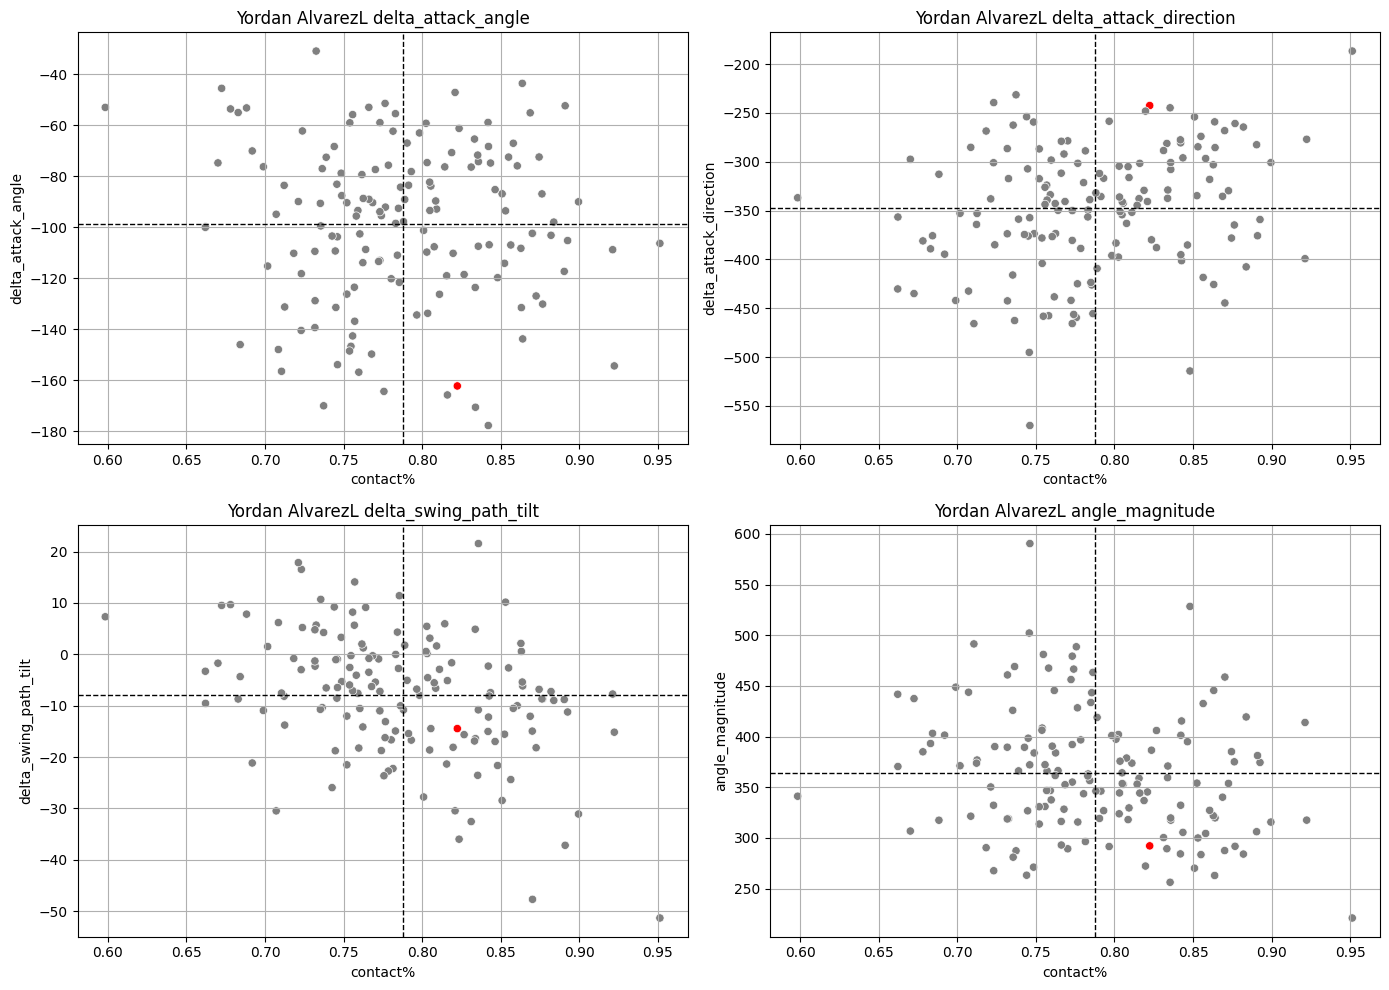

In [44]:
angle_plot(players_2strikes, 'Yordan AlvarezL')

# Isaac Paredes: the weird guy in baseball

In [30]:
paredes = qualified_df[qualified_df['name_with_stand'] == 'Isaac ParedesR'].reset_index(drop=True)
paredes

,batter,batter_name,game_date,pitch_type,player_name,des,batter,stand,p_throws,release_speed,pfx_x,pfx_z,plate_x,plate_z,attack_angle,launch_angle,launch_speed,bat_speed,swing_path_tilt,attack_direction,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,events,description,zone,hit_location,bb_type,balls,strikes,outs_when_up,hc_x,hc_y,sz_top,sz_bot,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,delta_run_exp,swing_length,estimated_slg_using_speedangle,age_bat,if_fielding_alignment,of_fielding_alignment,n_thruorder_pitcher,is_foul,is_contact,is_whiff,is_inzone,is_inplay,is_single,is_double,is_triple,is_hr,is_bb,is_K,is_hbp,is_sf,is_sacbunt,is_catch_inf,is_truncated,PA_id,name_with_stand,dir_sign,is_swing,is_zone_swing,chase_swing,is_gb,is_oppo
0,670623,Isaac Paredes,2024-09-29,SL,"Gibaut, Ian",Isaac Paredes flies out to left fielder Spence...,670623,R,R,88.0,0.50,0.76,0.14,3.75,20.185478,36.0,93.2,64.2,18.908024,-5.601200,40.333515,37.942437,field_out,hit_into_play,12.0,7.0,fly_ball,1,1,1,83.32,89.22,3.28,1.58,324.0,0.054,0.098,0.0,1.0,0.0,0.0,3.0,63,-0.215,7.4,0.176,25,Standard,Standard,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2024-09-29_63,Isaac ParedesR,1,1,0,1,0,0
1,670623,Isaac Paredes,2024-09-29,FC,"Gibaut, Ian",Isaac Paredes flies out to left fielder Spence...,670623,R,R,89.9,0.63,0.51,0.84,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball,14.0,NaN,NaN,0,1,1,NaN,NaN,3.31,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,0.015,NaN,NaN,25,Standard,Standard,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2024-09-29_63,Isaac ParedesR,1,0,0,0,0,0
2,670623,Isaac Paredes,2024-09-29,FF,"Gibaut, Ian",Isaac Paredes flies out to left fielder Spence...,670623,R,R,91.0,-0.37,1.27,-0.56,2.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,called_strike,4.0,NaN,NaN,0,0,1,NaN,NaN,3.28,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,-0.039,NaN,NaN,25,Standard,Standard,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2024-09-29_63,Isaac ParedesR,1,0,0,0,0,0
3,670623,Isaac Paredes,2024-09-29,FS,"Cruz, Fernando",Isaac Paredes strikes out swinging.,670623,R,R,81.0,-0.31,-0.12,0.21,0.67,13.353360,NaN,NaN,19.6,38.156096,-5.565033,38.209758,31.228653,strikeout,swinging_strike_blocked,14.0,2.0,NaN,2,2,1,NaN,NaN,3.28,1.58,NaN,NaN,0.000,0.0,1.0,0.0,0.0,NaN,46,-0.229,7.0,NaN,25,Standard,Standard,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2024-09-29_46,Isaac ParedesR,1,1,0,1,0,0
4,670623,Isaac Paredes,2024-09-29,FS,"Cruz, Fernando",Isaac Paredes strikes out swinging.,670623,R,R,80.8,-0.51,0.14,2.07,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball,14.0,NaN,NaN,1,2,1,NaN,NaN,3.22,1.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,0.048,NaN,NaN,25,Standard,Standard,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2024-09-29_46,Isaac ParedesR,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,670623,Isaac Paredes,2024-08-01,CU,"Gray, Sonny",Isaac Paredes pops out to pitcher Sonny Gray.,670623,R,R,79.9,0.62,-1.22,0.56,2.06,16.111450,79.0,63.3,73.9,32.782515,-44.128385,41.129732,53.463656,field_out,hit_into_play,9.0,1.0,popup,0,1,0,124.57,189.07,3.33,1.51,34.0,0.006,0.006,0.0,1.0,0.0,0.0,3.0,31,-0.217,8.7,0.007,25,Standard,Standard,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2024-08-01_31,Isaac ParedesR,1,1,1,0,0,0
2849,670623,Isaac Paredes,2024-08-01,SI,"Gray, Sonny",Isaac Paredes pops out to pitcher Sonny Gray.,670623,R,R,91.7,-0.90,0.63,0.09,2.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,called_strike,2.0,NaN,NaN,0,0,0,NaN,NaN,3.36,1.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,-0.037,NaN,NaN,25,Standard,Standard,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2024-08-01_31,Isaac ParedesR,1,0,0,0,0,0
2850,670623,Isaac Paredes,2024-08-01,FC,"Gray, Sonny","Isaac Paredes grounds out, third baseman Nol

NameError: name 'count_angles' is not defined

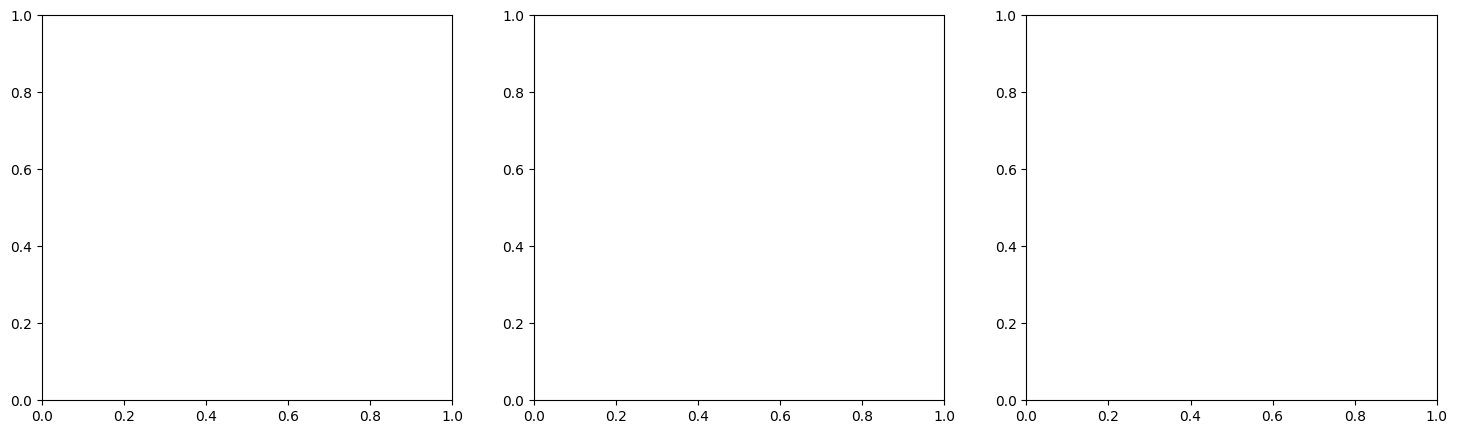

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# List of angle features and titles
angles = ['attack_angle', 'attack_direction', 'swing_path_tilt']
titles = ['Attack Angle', 'Attack Direction', 'Swing Path Tilt']

# Loop through and plot each
for ax, angle, title in zip(axes, angles, titles):
    sns.lineplot(
        data=count_angles,
        x='strikes',
        y=angle,
        hue='balls',
        marker="o",
        ax=ax
    )
    ax.set_xticks([0, 1, 2])
    ax.set_xlabel("Strikes")
    ax.set_ylabel(angle.replace('_', ' ').title())
    ax.set_title(f"Isaac Paredes: {title} by Count")
    ax.grid(True)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, '2 Strike Spray Chart')

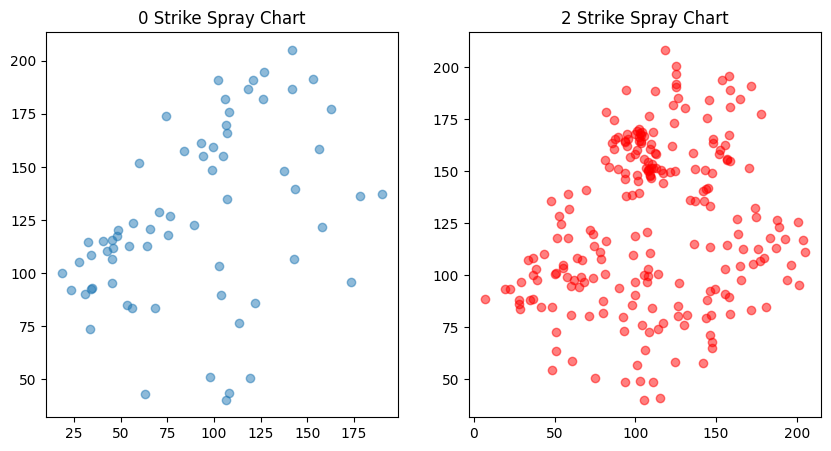

In [32]:
zero = paredes[paredes['strikes'] == 0]
two = paredes[paredes['strikes'] == 2]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(zero['hc_x'], zero['hc_y'], alpha=0.5)
plt.title("0 Strike Spray Chart")

plt.subplot(1, 2, 2)
plt.scatter(two['hc_x'], two['hc_y'], alpha=0.5, color='red')
plt.title("2 Strike Spray Chart")

/var/folders/6r/152n25q91lzcqtjmm1gt04vc0000gn/T/ipykernel_1618/1883238519.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(zero['attack_angle'], label='0 Strikes', shade=True)
/var/folders/6r/152n25q91lzcqtjmm1gt04vc0000gn/T/ipykernel_1618/1883238519.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(two['attack_angle'], label='2 Strikes', shade=True)


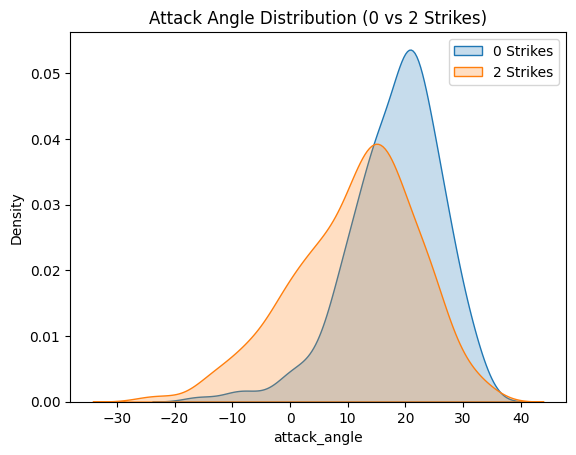

In [33]:
sns.kdeplot(zero['attack_angle'], label='0 Strikes', shade=True)
sns.kdeplot(two['attack_angle'], label='2 Strikes', shade=True)
plt.title("Attack Angle Distribution (0 vs 2 Strikes)")
plt.legend()

Text(0.5, 1.0, 'Contact Rate by Count')

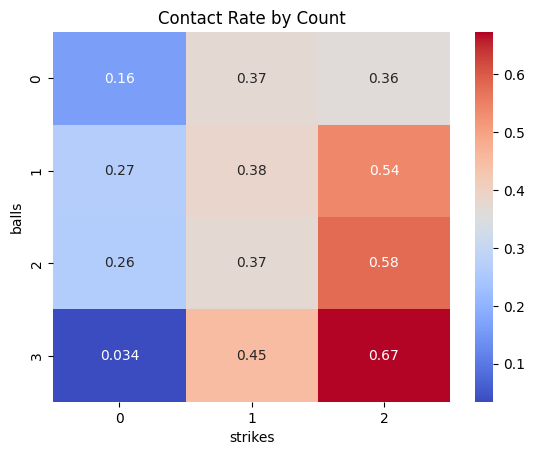

In [34]:
heatmap_data = paredes.groupby(['balls', 'strikes'])['is_contact'].mean().unstack()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title("Contact Rate by Count")

NameError: name 'paredes_row' is not defined

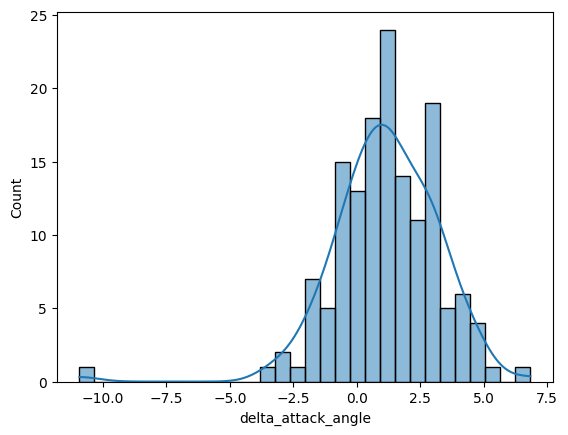

In [35]:
angles_df = players_2strikes.copy()
for angle in ['delta_attack_angle', 'delta_attack_direction', 'delta_swing_path_tilt']:
    sns.histplot(angles_df[angle], bins=30, kde=True)
    plt.axvline(paredes_row[angle], color='red', linestyle='--', label='Paredes')
    plt.title(f"{angle} Distribution Across Players")
    plt.legend()
    plt.show()

In [24]:
player_rates(zero_strike_counts)

,name_with_stand,is_swing,is_inzone,is_whiff,is_contact,is_foul,is_zone_swing,is_inplay,is_oppo,is_gb,pitches_seen,swing%,zone_swing%,chase%,contact%,whiff%,foul%,in_play%,oppo%,gb%
0,Aaron JudgeR,432,549,129,303,166,315,137,23,41,1275,0.338824,0.729167,0.270833,0.701389,0.298611,0.384259,0.317130,0.167883,0.299270
1,Adley RutschmanL,149,374,25,124,67,106,57,10,12,727,0.204952,0.711409,0.288591,0.832215,0.167785,0.449664,0.382550,0.175439,0.210526
2,Adley RutschmanR,46,143,7,39,12,36,27,3,11,299,0.153846,0.782609,0.217391,0.847826,0.152174,0.260870,0.586957,0.111111,0.407407
3,Adolis GarciaR,410,420,147,263,150,246,113,22,39,940,0.436170,0.600000,0.400000,0.641463,0.358537,0.365854,0.275610,0.194690,0.345133
4,Alec BohmR,389,437,63,326,148,259,178,28,81,967,0.402275,0.665810,0.334190,0.838046,0.161954,0.380463,0.457584,0.157303,0.455056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Yainer DiazR,456,424,101,355,178,281,177,26,87,900,0.506667,0.616228,0.383772,0.778509,0.221491,0.390351,0.388158,0.146893,0.491525
144,Yandy DiazR,277,500,35,242,125,207,117,23,68,1012,0.273715,0.747292,0.252708,0.873646,0.126354,0.451264,0.422383,0.196581,0.581197
145,Yordan AlvarezL,368,440,65,303,154,236,149,24,47,1017,0.361849,0.641304,0.358696,0.823370,0.176630,0.418478,0.404891,0.161074,0.315436
146,Zach NetoR,332,404,89,242,124,213,118,9,52,920,0.360870,0.641566,0.358434,0.728916,0.271084,0.373494,0.355422,0.076271,0.440678


In [55]:
by_zero = with_percentile.sort_values(by='wOBA_y', ascending=False).reset_index(drop= True)
by_zero.sort_values(by='wOBA_y', ascending=False)

NameError: name 'with_percentile' is not defined

In [47]:
zero_strike_angles = zero_strike_counts.groupby('name_with_stand')[['attack_angle', 'attack_direction','swing_path_tilt']].mean().reset_index()

In [48]:
two_strike_angles = two_strike_counts.groupby('name_with_stand')[['attack_angle', 'attack_direction','swing_path_tilt']].mean().reset_index()

In [49]:
two_strike_angles

,name_with_stand,attack_angle,attack_direction,swing_path_tilt
0,Aaron JudgeR,13.253680,-3.569578,39.213226
1,Adley RutschmanL,10.903163,0.373206,35.602785
2,Adley RutschmanR,6.484802,-4.986513,39.383939
3,Adolis GarciaR,9.291412,0.611513,28.851781
4,Alec BohmR,3.967691,7.278852,30.065676
...,...,...,...,...
143,Yainer DiazR,10.425331,4.456266,29.679087
144,Yandy DiazR,3.778240,7.915951,24.327193
145,Yordan AlvarezL,7.737744,4.203077,35.345654
146,Zach NetoR,12.170277,-3.632310,33.483228


In [50]:
delta_angles = zero_strike_angles.merge(two_strike_angles, on = "name_with_stand", how = 'inner')
delta_angles.loc[:,"delta_attack_angle"] = delta_angles["attack_angle_x"] - delta_angles["attack_angle_y"]
delta_angles.loc[:,"delta_attack_direction"] = delta_angles["attack_direction_x"] - delta_angles["attack_direction_y"]
delta_angles.loc[:,"delta_swing_path_tilt(std)"] = delta_angles["swing_path_tilt_x"] - delta_angles["swing_path_tilt_y"]
delta_angles = delta_angles[['name_with_stand', "delta_attack_angle", "delta_attack_direction", "delta_swing_path_tilt(std)"]].copy()
delta_angles.loc[:,"mag_angles"] = delta_angles[["delta_attack_angle", "delta_attack_direction"]].apply(lambda x: x**2).sum(axis = 1).apply(lambda x : np.sqrt(x))

delta_angles.sort_values(by='mag_angles', ascending=False)

,name_with_stand,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt(std),mag_angles
63,Jacob YoungR,-10.930536,-17.433294,7.030987,20.576598
92,Leody TaverasR,-3.001096,-12.172849,4.628504,12.537337
29,Cal RaleighR,4.825505,-11.070632,0.492995,12.076605
58,Isaac ParedesR,6.840457,-9.890484,-0.647165,12.025537
44,Elly De La CruzR,-0.644026,-10.143985,1.819556,10.164409
...,...,...,...,...,...
89,Kyle SchwarberL,-0.235675,-0.352141,0.873750,0.423728
130,Taylor WardR,-0.301603,-0.265312,0.703859,0.401690
57,Ian HappR,0.115114,-0.340526,1.854339,0.359457
51,George SpringerR,0.208735,-0.060395,-0.293264,0.217297


In [51]:
by_zero.merge(delta_angles, on = "name_with_stand", how = 'inner').sort_values(by='mag_angles', ascending= False).head(30)

NameError: name 'by_zero' is not defined

In [52]:
by_zero.merge(delta_angles, on = "name_with_stand", how = 'inner').sort_values(by='T_st_percentile', ascending= False).head(30)

NameError: name 'by_zero' is not defined

In [53]:
by_zero.describe()

NameError: name 'by_zero' is not defined

In [54]:
woba_angles = by_zero.merge(delta_angles, on = "name_with_stand", how = 'inner')
woba_angles[(woba_angles["delta_attack_direction"] <= -2*1.393645 + (-0.914905)	) | (woba_angles["delta_attack_direction"] >= 2*1.393645 + (-0.914905))]

NameError: name 'by_zero' is not defined

In [35]:
woba_angles.describe()

,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt(std),mag_angles
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.090592,0.251102,50.337838,50.337838,1.153455,-0.316961,0.912986,3.808635
std,0.020443,0.035357,28.964875,28.964875,2.085127,4.190282,1.195817,2.956772
min,0.051416,0.173484,0.675676,0.675676,-10.930536,-17.433294,-4.614124,0.097388
25%,0.077237,0.228774,25.506757,25.506757,-0.008607,-2.852138,0.416565,1.681325
50%,0.089293,0.249566,50.337838,50.337838,1.179265,0.043706,0.954463,3.182985
75%,0.102122,0.272657,75.168919,75.168919,2.680581,2.681295,1.471338,4.940262
max,0.173636,0.365698,100.000000,100.000000,6.840457,9.260391,7.030987,20.576598


In [36]:
by_zero.merge(delta_angles, on = "name_with_stand", how = 'inner').sort_values(by='delta_attack_angle', ascending= False).iloc[-15:]

,name_with_stand,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt(std),mag_angles
100,Jackson MerrillL,0.128213,0.234764,95.945946,32.432432,-1.223768,0.226802,0.803302,1.244607
94,Josh BellR,0.079310,0.237110,30.405405,36.486486,-1.238569,0.544495,-3.553854,1.352970
39,Jonathan IndiaR,0.074410,0.270783,20.945946,73.648649,-1.331397,0.122902,0.630519,1.337058
29,Yandy DiazR,0.071435,0.276071,16.891892,80.405405,-1.542522,0.102633,1.927041,1.545933
86,Corbin CarrollL,0.083251,0.241037,37.837838,41.891892,-1.713242,-1.331162,1.001204,2.169606
144,Zack GelofR,0.084254,0.188871,40.540541,2.702703,-1.790293,3.540859,0.571006,3.967723
7,Jesse WinkerL,0.081528,0.311454,35.135135,95.270270,-1.808896,-0.965699,0.566394,2.050531
43,Ketel MarteR,0.173636,0.270057,100.000000,70.945946,-1.836333,2.672647,-0.195157,3.242709
57,Cedric MullinsL,0.091336,0.261450,56.081081,61.486486,-1.931211,7.686181,3.808526,7.925084
141,Jake MeyersR,0.110168,0.195020,84.459459,4.729730,-2.019040,-3.442180,1.588613,3.990630


In [37]:
players_to_drop = ['Jacob YoungR', 'Elly De La CruzR', 'Leody TaverasR', 'Jurickson ProfarL', 'Jake MeyersR']
woba_angles = woba_angles[~woba_angles['name_with_stand'].isin(players_to_drop)].copy()

In [38]:
def woba_angle_plot(player_name: str):
    df = woba_angles.copy()
    df[f"highlight_{player_name}"] = df["name_with_stand"] == player_name

    angles = ["delta_attack_angle", "delta_attack_direction", "delta_swing_path_tilt(std)", "mag_angles"]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()  # Easier indexing

    for idx, i in enumerate(angles):
        ax = axes[idx]
        sns.scatterplot(data=df, x="wOBA_y", y=i, hue=f"highlight_{player_name}", palette={True: "red", False: "gray"}, legend=False, ax=ax)
        ax.axvline(np.mean(df["wOBA_y"]), color="black", linestyle="dashed", linewidth=1)
        ax.axhline(np.mean(df[i]), color="black", linestyle="dashed", linewidth=1)
        ax.set_title(f"{player_name} {i}")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

• bobby witt
• rafael devers
• luis arraez
• brendan donovan
• seiya suzuki
• steven kwan
• adeley rutschman (S)
• carlos santana (S)
• francisco lindor (S)
• jurickson profar
• jesse winker
• joey ortiz
• ketel marte
• vladdy

In [39]:
interesting_players = [
                     #   'Gunnar HendersonL',
                     #   'Bobby Witt Jr.R',
                     #   'Rafael DeversL',
                     #   'Luis ArraezL',
                     #   'Brendan DonovanL',
                      #  'Seiya SuzukiR',
                      #  'Steven KwanL',
                    #    'Adley RutschmanL',
                    #    'Adley RutschmanR',
                    #    'Carlos SantanaL',
                    #    'Carlos SantanaR',
                    #    'Francisco LindorL',
                    #    'Francisco LindorR',
                    #    'Jurickson ProfarL',
                    #    'Jurickson ProfarR',
                     #   'Jesse WinkerL',
                     #   'Joey OrtizR',
                      #  'Ketel MarteL',
                      #  'Ketel MarteR',
                     #   'Vladimir Guerrero Jr.R'
                       ]

In [40]:
for i in interesting_players:
    woba_angle_plot(i)

In [41]:
interesting_angles_zero = zero_strike_counts[['name_with_stand', 'attack_angle', 'attack_direction', 'swing_path_tilt']].copy()
interesting_angles_zero = interesting_angles_zero.groupby('name_with_stand').agg({'attack_angle': 'var', 'attack_direction': 'var','swing_path_tilt': 'var'}).reset_index()

interesting_angles_two = two_strike_counts[['name_with_stand', 'attack_angle', 'attack_direction', 'swing_path_tilt']].copy()
interesting_angles_two = interesting_angles_two.groupby('name_with_stand').agg({'attack_angle': 'var', 'attack_direction': 'var','swing_path_tilt': 'var'}).reset_index()

interesting_angles = interesting_angles_zero.merge(interesting_angles_two, on='name_with_stand', how='inner')
interesting_angles = interesting_angles.rename(columns={'attack_angle_x': 'var_attack_angle_0', 'attack_angle_y': 'var_attack_angle_2',
                                                        'attack_direction_x': 'var_attack_direction_0', 'attack_direction_y': 'var_attack_direction_2',
                                                        'swing_path_tilt_x': 'var_swing_path_tilt_0', 'swing_path_tilt_y': 'var_swing_path_tilt_2',})
interesting_angles = interesting_angles.sort_index(axis=1).copy()
interesting_angles

,name_with_stand,var_attack_angle_0,var_attack_angle_2,var_attack_direction_0,var_attack_direction_2,var_swing_path_tilt_0,var_swing_path_tilt_2
0,Aaron JudgeR,136.317977,132.962102,223.167798,235.080209,13.911115,23.210277
1,Adley RutschmanL,99.126774,127.486126,249.054430,338.801415,36.244612,50.408205
2,Adley RutschmanR,105.082146,138.945127,230.058549,254.532122,19.449377,43.453060
3,Adolis GarciaR,113.838341,86.617203,564.478898,439.236618,27.846255,40.535761
4,Alec BohmR,75.490080,80.216256,268.749551,275.069465,24.214959,33.198635
...,...,...,...,...,...,...,...
143,Yainer DiazR,87.759716,74.211894,262.941558,292.755157,31.899571,53.338393
144,Yandy DiazR,47.963544,45.874739,254.292237,267.208443,20.703447,31.651766
145,Yordan AlvarezL,181.333877,169.675751,398.635334,248.634805,48.639624,49.691942
146,Zach NetoR,161.226719,101.026622,586.180587,368.565215,34.474537,39.434347


In [42]:
# Create a new column for total absolute change across the 3 metrics
interesting_angles["change_attack_angle"] = (
    (interesting_angles["var_attack_angle_0"] - interesting_angles["var_attack_angle_2"]))
interesting_angles["change_attack_direction"] = (
    (interesting_angles["var_attack_direction_0"] - interesting_angles["var_attack_direction_2"]))
interesting_angles["change_swing_path_tilt"] = (
    (interesting_angles["var_swing_path_tilt_0"] - interesting_angles["var_swing_path_tilt_2"]))
# Sort by that total change, descending
interesting_angles_sorted = interesting_angles.sort_values(by="change_swing_path_tilt")

In [43]:
by_zero

,name_with_stand,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile
0,Jose RamirezL,0.070287,0.365698,15.540541,100.000000
1,Jose RamirezR,0.091217,0.352734,55.405405,99.324324
2,Aaron JudgeR,0.139485,0.341721,97.972973,98.648649
3,Ketel MarteL,0.098771,0.337322,70.270270,97.972973
4,Vladimir Guerrero Jr.R,0.104854,0.324244,77.702703,97.297297
...,...,...,...,...,...
143,Jesus SanchezL,0.112871,0.192535,87.837838,3.378378
144,Zack GelofR,0.084254,0.188871,40.540541,2.702703
145,Andrew VaughnR,0.108262,0.187697,81.756757,2.027027
146,Bryan De La CruzR,0.098548,0.179526,69.594595,1.351351


In [44]:
interesting_angles_sorted.merge(by_zero, on='name_with_stand', how='inner').head(30)

,name_with_stand,var_attack_angle_0,var_attack_angle_2,var_attack_direction_0,var_attack_direction_2,var_swing_path_tilt_0,var_swing_path_tilt_2,change_attack_angle,change_attack_direction,change_swing_path_tilt,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile
0,Matt ChapmanR,53.111546,67.136485,302.270386,378.898605,32.455352,62.728978,-14.024938,-76.628218,-30.273626,0.095176,0.248862,61.486486,50.000000
1,Cody BellingerL,73.092363,86.549774,247.760495,248.968276,26.955949,56.455495,-13.457411,-1.207781,-29.499546,0.095723,0.262965,62.162162,65.540541
2,Bobby Witt Jr.R,75.106181,84.060102,244.224561,283.507102,33.902517,62.092833,-8.953921,-39.282540,-28.190316,0.122547,0.299346,93.918919,91.891892
3,Jose RamirezR,69.931889,58.059794,377.760011,373.326946,37.304880,64.369616,11.872095,4.433064,-27.064736,0.091217,0.352734,55.405405,99.324324
4,Alec BurlesonL,109.682635,117.271628,311.690362,416.594025,30.945121,57.889851,-7.588992,-104.903664,-26.944731,0.084657,0.239513,41.891892,41.216216
5,Luis ArraezL,181.021492,114.208110,324.391465,185.408270,63.160728,90.053793,66.813382,138.983194,-26.893064,0.062914,0.281294,8.108108,85.135135
6,Francisco LindorR,108.191904,90.948007,467.015259,312.795284,22.122110,48.186317,17.243897,154.219975,-26.064207,0.091076,0.267753,54.054054,68.243243
7,Adley RutschmanR,105.082146,138.945127,230.058549,254.532122,19.449377,43.453060,-33.862982,-24.473573,-24.003682,0.079204,0.305906,29.729730,92.567568
8,Jonathan IndiaR,153.941651,114.472823,354.069312,300.179799,16.692478,40.588333,39.468828,53.889513,-23.895855,0.074410,0.270783,20.945946,73.648649
9,Anthony SantanderR,81.840700,82.120354,369.302667,386.270319,27.283685,50.775769,-0.279654,-16.967652,-23.492084,0.058418,0.262926,5.405405,64.864865


In [45]:
interesting_angles_sorted.merge(by_zero, on='name_with_stand', how='inner').head(30)

,name_with_stand,var_attack_angle_0,var_attack_angle_2,var_attack_direction_0,var_attack_direction_2,var_swing_path_tilt_0,var_swing_path_tilt_2,change_attack_angle,change_attack_direction,change_swing_path_tilt,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile
0,Matt ChapmanR,53.111546,67.136485,302.270386,378.898605,32.455352,62.728978,-14.024938,-76.628218,-30.273626,0.095176,0.248862,61.486486,50.000000
1,Cody BellingerL,73.092363,86.549774,247.760495,248.968276,26.955949,56.455495,-13.457411,-1.207781,-29.499546,0.095723,0.262965,62.162162,65.540541
2,Bobby Witt Jr.R,75.106181,84.060102,244.224561,283.507102,33.902517,62.092833,-8.953921,-39.282540,-28.190316,0.122547,0.299346,93.918919,91.891892
3,Jose RamirezR,69.931889,58.059794,377.760011,373.326946,37.304880,64.369616,11.872095,4.433064,-27.064736,0.091217,0.352734,55.405405,99.324324
4,Alec BurlesonL,109.682635,117.271628,311.690362,416.594025,30.945121,57.889851,-7.588992,-104.903664,-26.944731,0.084657,0.239513,41.891892,41.216216
5,Luis ArraezL,181.021492,114.208110,324.391465,185.408270,63.160728,90.053793,66.813382,138.983194,-26.893064,0.062914,0.281294,8.108108,85.135135
6,Francisco LindorR,108.191904,90.948007,467.015259,312.795284,22.122110,48.186317,17.243897,154.219975,-26.064207,0.091076,0.267753,54.054054,68.243243
7,Adley RutschmanR,105.082146,138.945127,230.058549,254.532122,19.449377,43.453060,-33.862982,-24.473573,-24.003682,0.079204,0.305906,29.729730,92.567568
8,Jonathan IndiaR,153.941651,114.472823,354.069312,300.179799,16.692478,40.588333,39.468828,53.889513,-23.895855,0.074410,0.270783,20.945946,73.648649
9,Anthony SantanderR,81.840700,82.120354,369.302667,386.270319,27.283685,50.775769,-0.279654,-16.967652,-23.492084,0.058418,0.262926,5.405405,64.864865


In [46]:
interesting_angles_sorted.merge(by_zero, on='name_with_stand', how='inner').head(30)

,name_with_stand,var_attack_angle_0,var_attack_angle_2,var_attack_direction_0,var_attack_direction_2,var_swing_path_tilt_0,var_swing_path_tilt_2,change_attack_angle,change_attack_direction,change_swing_path_tilt,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile
0,Matt ChapmanR,53.111546,67.136485,302.270386,378.898605,32.455352,62.728978,-14.024938,-76.628218,-30.273626,0.095176,0.248862,61.486486,50.000000
1,Cody BellingerL,73.092363,86.549774,247.760495,248.968276,26.955949,56.455495,-13.457411,-1.207781,-29.499546,0.095723,0.262965,62.162162,65.540541
2,Bobby Witt Jr.R,75.106181,84.060102,244.224561,283.507102,33.902517,62.092833,-8.953921,-39.282540,-28.190316,0.122547,0.299346,93.918919,91.891892
3,Jose RamirezR,69.931889,58.059794,377.760011,373.326946,37.304880,64.369616,11.872095,4.433064,-27.064736,0.091217,0.352734,55.405405,99.324324
4,Alec BurlesonL,109.682635,117.271628,311.690362,416.594025,30.945121,57.889851,-7.588992,-104.903664,-26.944731,0.084657,0.239513,41.891892,41.216216
5,Luis ArraezL,181.021492,114.208110,324.391465,185.408270,63.160728,90.053793,66.813382,138.983194,-26.893064,0.062914,0.281294,8.108108,85.135135
6,Francisco LindorR,108.191904,90.948007,467.015259,312.795284,22.122110,48.186317,17.243897,154.219975,-26.064207,0.091076,0.267753,54.054054,68.243243
7,Adley RutschmanR,105.082146,138.945127,230.058549,254.532122,19.449377,43.453060,-33.862982,-24.473573,-24.003682,0.079204,0.305906,29.729730,92.567568
8,Jonathan IndiaR,153.941651,114.472823,354.069312,300.179799,16.692478,40.588333,39.468828,53.889513,-23.895855,0.074410,0.270783,20.945946,73.648649
9,Anthony SantanderR,81.840700,82.120354,369.302667,386.270319,27.283685,50.775769,-0.279654,-16.967652,-23.492084,0.058418,0.262926,5.405405,64.864865


In [13]:
sorted(qualified_df["game_date"].unique())

['2024-03-28',
 '2024-03-29',
 '2024-03-30',
 '2024-03-31',
 '2024-04-01',
 '2024-04-02',
 '2024-04-03',
 '2024-04-04',
 '2024-04-05',
 '2024-04-06',
 '2024-04-07',
 '2024-04-08',
 '2024-04-09',
 '2024-04-10',
 '2024-04-11',
 '2024-04-12',
 '2024-04-13',
 '2024-04-14',
 '2024-04-15',
 '2024-04-16',
 '2024-04-17',
 '2024-04-18',
 '2024-04-19',
 '2024-04-20',
 '2024-04-21',
 '2024-04-22',
 '2024-04-23',
 '2024-04-24',
 '2024-04-25',
 '2024-04-26',
 '2024-04-27',
 '2024-04-28',
 '2024-04-29',
 '2024-04-30',
 '2024-05-01',
 '2024-05-02',
 '2024-05-03',
 '2024-05-04',
 '2024-05-05',
 '2024-05-06',
 '2024-05-07',
 '2024-05-08',
 '2024-05-09',
 '2024-05-10',
 '2024-05-11',
 '2024-05-12',
 '2024-05-13',
 '2024-05-14',
 '2024-05-15',
 '2024-05-16',
 '2024-05-17',
 '2024-05-18',
 '2024-05-19',
 '2024-05-20',
 '2024-05-21',
 '2024-05-22',
 '2024-05-23',
 '2024-05-24',
 '2024-05-25',
 '2024-05-26',
 '2024-05-27',
 '2024-05-28',
 '2024-05-29',
 '2024-05-30',
 '2024-05-31',
 '2024-06-01',
 '2024-06-

In [17]:
qualified_df[qualified_df['batter_name'] == "Adolis Garcia"].shape[0]

1319

In [102]:
import pandas as pd
from typing import List, Dict

def split_by_count(
    df: pd.DataFrame,
    batter_names: List[str],
    year: int
) -> Dict[str, Dict[str, pd.DataFrame]]:
    """
    For each batter in batter_names, filter df to that batter & year,
    then produce swing/non-swing splits by count.
    
    Returns a dict:
      {
        batter_name: {
          "all":    DataFrame of all PAs,
          "swing":  DataFrame of swings only (attack_angle not NA),
          "Z_st":   swings with strikes==0,
          "ZZ_st":  swings with strikes==0 & balls==0,
          "T_st":   swings with strikes==2,
        },
        ...
      }
    """
    out = {}
    for name in batter_names:
        # all PAs for this batter & year
        all_pa = df[(df["batter_name"] == name)]
        # only swings
        non_swings = ['ball', 'blocked_ball', 'called_strike', 'hit_by_pitch', 'pitchout']
        swing = all_pa[~all_pa['description'].isin(non_swings)].reset_index(drop=True).copy()
        out[name] = {
            "all":   all_pa,
            "swing": swing,
            "Z_st":  swing[swing["strikes"] == 0]
                          .sort_values(by="bb_type"),
            "ZZ_st": swing[(swing["strikes"] == 0) & (swing["balls"] == 0)]
                          .sort_values(by="bb_type"),
            "T_st":  swing[swing["strikes"] == 2]
                          .sort_values(by="bb_type"),
        }
    return out

# Example usage:
batters = ['Brendan Donovan',
 'Fernando Tatis Jr.',
 'Freddie Freeman',
 'J.D. Martinez',
 'Nico Hoerner',
 'George Springer',
 'Gleyber Torres',
 'Pete Alonso',
 'J.P. Crawford',
 'Adolis Garcia']
splits = split_by_count(batter_data, batters, 2024)



In [155]:
T_st = splits["Brendan Donovan"]["T_st"]
Z_st = splits["Brendan Donovan"]["Z_st"]
ZZ_st = splits["Brendan Donovan"]["ZZ_st"]

Z_st_whiff = (Z_st['description'] == 'swinging_strike').astype(int)
Z_st_contact = 1 - (Z_st_whiff.sum() / Z_st.shape[0])
ZZ_st_whiff = (ZZ_st['description'] == 'swinging_strike').astype(int)
ZZ_st_contact = 1 - (ZZ_st_whiff.sum() / ZZ_st.shape[0])
T_st_whiff = (T_st['description'] == 'swinging_strike').astype(int)
T_st_contact = 1 - (T_st_whiff.sum() / T_st.shape[0])
Z_st_contact, ZZ_st_contact, T_st_contact, T_st.shape[0]

(np.float64(0.8916967509025271),
 np.float64(0.8854961832061069),
 np.float64(0.8943488943488943),
 407)

In [107]:
Young = batter_data[(batter_data["batter_name"] == "Jacob Young")]
Young_swing = Young[~Young["attack_angle"].isna()]
Z_st = Young_swing[Young_swing["strikes"] == 0].sort_values(by = "bb_type")
ZZ_st = Young_swing[(Young_swing["strikes"] == 0)& (Young_swing["balls"] == 0)].sort_values(by = "bb_type")
T_st = Young_swing[Young_swing["strikes"] == 2].sort_values(by = "bb_type")

In [108]:
Z_st_whiff = (Z_st['description'] == 'swinging_strike').astype(int)
Z_st_contact = 1 - (Z_st_whiff.sum() / Z_st.shape[0])
Z_st_contact


np.float64(0.9019607843137255)

In [109]:
ZZ_st_whiff = (ZZ_st['description'] == 'swinging_strike').astype(int)
ZZ_st_contact = 1 - (ZZ_st_whiff.sum() / ZZ_st.shape[0])
ZZ_st_contact

np.float64(0.8617886178861789)

In [110]:
T_st_whiff = (T_st['description'] == 'swinging_strike').astype(int)
T_st_contact = 1 - (T_st_whiff.sum() / T_st.shape[0])
T_st_contact

np.float64(0.8270440251572327)

In [125]:
list(Young["bb_type"].dropna().unique())

['ground_ball', 'line_drive', 'fly_ball', 'popup']

In [146]:
T_st["bb_type"].value_counts()

bb_type
ground_ball    71
line_drive     37
fly_ball       18
popup           3
Name: count, dtype: int64

In [152]:
Young["bb_type"].dropna().count()

np.int64(377)

In [153]:
Z_st["bb_type"].value_counts().sum()

np.int64(83)

In [154]:
ZZ_st["bb_type"].value_counts().sum()

np.int64(43)

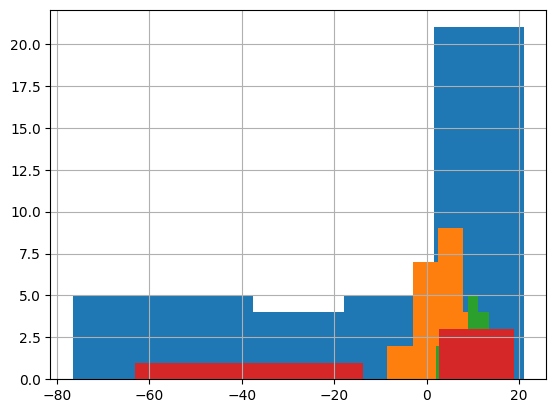

In [147]:
x =list(Young["bb_type"].dropna().unique())
for i in x:
    Z_st[Z_st["bb_type"] == i]["attack_angle"].hist(bins =5)

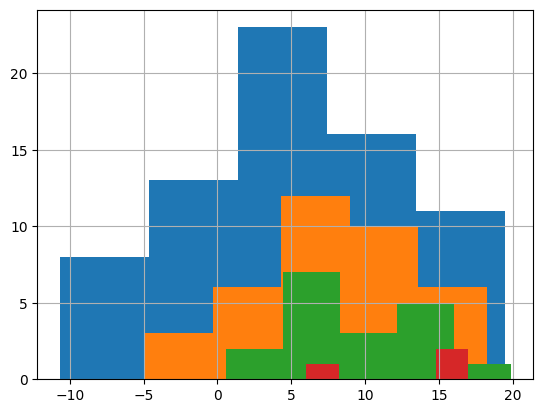

In [144]:
x =list(Young["bb_type"].dropna().unique())
for i in x:
    T_st[T_st["bb_type"] == i]["attack_angle"].hist(bins =5)

In [ ]:
for i in Young["bb_type"].dropna().unique():
    T_st[T_st[["bb_type"] == i]].hist(bins=20)
    Z_st[Z_st[["bb_type"] == i]].hist(bins=20)

<Axes: xlabel='attack_angle', ylabel='attack_direction'>

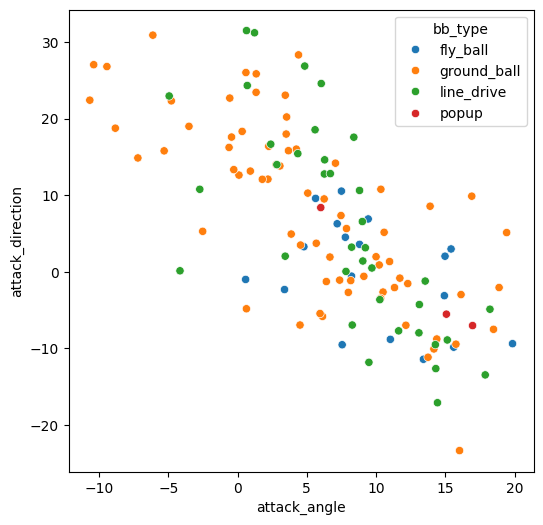

In [112]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=T_st, x='attack_angle', y="attack_direction" ,hue = "bb_type") 

In [75]:
mask = (
    (batter_data["balls"]   == 0) 
  & (batter_data["strikes"] == 0)
)
filtered = batter_data[mask]
qualified  = filtered.groupby("batter_name").count()
qualified = qualified[qualified["pitch_type"] >= (502)]
qualified_batters = qualified.index.to_list()
qualified_df = batter_data[batter_data["batter_name"].isin(qualified_batters)].reset_index(drop=True).copy()

non_swings = ['ball', 'blocked_ball', 'called_strike', 'hit_by_pitch', 'pitchout']
qualified_df = qualified_df[~qualified_df['description'].isin(non_swings)].reset_index(drop=True).copy()



In [76]:
qualified_df['description'].unique()

array(['hit_into_play', 'swinging_strike', 'foul',
       'swinging_strike_blocked', 'foul_bunt', 'foul_tip', 'missed_bunt',
       'bunt_foul_tip'], dtype=object)

In [77]:
qualified_df.loc[:, 'whiff'] = (qualified_df['description'] == 'swinging_strike').astype(int)
qualified_df.loc[:, 'foul'] = ((qualified_df['description'] == 'foul') |
                                           (qualified_df['description'] == 'foul_tip') | 
                                           (qualified_df['description'] == 'foul_bunt') |
                                           (qualified_df['description'] == 'bunt_foul_tip')).astype(int)
qualified_df.loc[:, 'inplay'] = (qualified_df['description'] == 'hit_into_play').astype(int)
qualified_df

,batter_name,game_date,pitch_type,player_name,batter,stand,p_throws,release_speed,pfx_x,pfx_z,plate_x,plate_z,attack_angle,launch_angle,launch_speed,bat_speed,swing_path_tilt,attack_direction,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,events,description,zone,hit_location,bb_type,balls,strikes,outs_when_up,hc_x,hc_y,sz_top,sz_bot,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,delta_run_exp,swing_length,estimated_slg_using_speedangle,age_bat,if_fielding_alignment,of_fielding_alignment,n_thruorder_pitcher,whiff,foul,inplay
0,Matt Olson,2024-09-30,FF,"Díaz, Edwin",621566,L,R,94.2,-1.11,1.20,0.84,2.93,19.556424,58.0,76.1,77.4,36.395467,-13.249187,27.056603,30.890146,field_out,hit_into_play,12.0,6.0,popup,0,0,0,121.61,125.27,3.41,1.68,189.0,0.037,0.039,0.0,1.0,0.0,0.0,3.0,79,-0.254,7.0,0.049,30,Strategic,Standard,1,0,0,1
1,Francisco Lindor,2024-09-30,CU,"Johnson, Pierce",596019,L,R,86.4,0.84,-0.19,0.15,1.72,18.194293,35.0,107.2,80.2,40.203398,-6.316046,34.743653,35.039294,home_run,hit_into_play,8.0,NaN,fly_ball,0,0,1,157.02,36.68,3.33,1.52,413.0,0.791,1.621,2.0,1.0,0.0,3.0,6.0,76,1.436,8.1,3.146,31,Standard,Standard,1,0,0,1
2,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.7,0.04,0.39,0.55,2.52,23.407233,NaN,NaN,78.4,32.959287,-21.244835,43.777675,40.352334,strikeout,swinging_strike,6.0,2.0,NaN,3,2,2,NaN,NaN,3.51,1.73,NaN,NaN,0.000,0.0,1.0,0.0,0.0,NaN,73,-0.298,8.1,NaN,34,Standard,Standard,1,1,0,0
3,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.5,0.10,0.37,0.94,1.28,30.284377,NaN,NaN,79.5,38.931011,-27.619390,46.668101,56.727472,NaN,swinging_strike,14.0,NaN,NaN,2,1,2,NaN,NaN,3.51,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.062,8.5,NaN,34,Standard,Standard,1,1,0,0
4,Marcell Ozuna,2024-09-30,FF,"Díaz, Edwin",542303,R,R,96.9,-1.05,0.90,-0.18,2.89,19.668645,86.0,NaN,77.4,31.854643,-12.917086,36.197899,37.759751,NaN,foul,5.0,NaN,NaN,1,0,2,NaN,NaN,3.51,1.73,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.043,8.0,NaN,34,Standard,Standard,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151036,Taylor Ward,2024-08-01,FF,"Feltner, Ryan",621493,R,R,94.5,-0.71,1.34,0.30,3.02,8.019776,53.0,80.3,66.9,25.922839,0.202764,39.037801,28.541395,NaN,foul,3.0,NaN,NaN,1,0,2,NaN,NaN,3.31,1.56,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,-0.051,7.1,NaN,31,Strategic,Standard,1,0,1,0
151037,Nolan Schanuel,2024-08-01,FF,"Feltner, Ryan",694384,L,R,92.6,-0.55,1.27,0.57,3.32,8.840891,-7.0,75.6,65.9,39.714925,8.987160,24.582353,29.520187,field_out,hit_into_play,3.0,3.0,ground_ball,0,0,0,158.49,160.67,3.42,1.65,21.0,0.083,0.062,0.0,1.0,0.0,0.0,2.0,4,-0.254,5.7,0.095,22,Standard,Standard,1,0,0,1
151038,Brenton Doyle,2024-08-01,CU,"Fulmer, Carson",686668,R,R,81.4,0.80,-0.64,0.08,1.61,24.061626,NaN,NaN,72.1,34.657429,-25.092950,37.847602,41.000265,strikeout,swinging_strike,8.0,2.0,NaN,0,2,2,NaN,NaN,3.43,1.65,NaN,NaN,0.000,0.0,1.0,0.0,0.0,NaN,3,-0.157,8.5,NaN,26,Infield shade,Standard,1,1,0,0
151039,Brenton Doyle,2024-08-01,FF,"Fulmer, Carson",686668,R,R,92.7,-0.53,1.28,0.09,2.35,-0.943737,34.0,92.1,68.7,35.042804,19.517692,37.989459,17.081261,NaN,foul,5.0,NaN,NaN,0,1,2,NaN,NaN,3.43,1.65,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,-0.058,6.9,NaN,26,Infield shade,Standard,1,0,1,0


In [ ]:

non_swings = ['ball', 'blocked_ball', 'called_strike', 'hit_by_pitch', 'pitchout']
swing_df = qualified_df[~qualified_df['description'].isin(non_swings)].reset_index(drop=True).copy()
swing_df

,batter_name,game_date,pitch_type,player_name,batter,stand,p_throws,release_speed,pfx_x,pfx_z,plate_x,plate_z,attack_angle,launch_angle,launch_speed,bat_speed,swing_path_tilt,attack_direction,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,events,description,zone,hit_location,bb_type,balls,strikes,outs_when_up,hc_x,hc_y,sz_top,sz_bot,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,delta_run_exp,swing_length,estimated_slg_using_speedangle,age_bat,if_fielding_alignment,of_fielding_alignment,n_thruorder_pitcher,whiff,foul,inplay
0,Matt Olson,2024-09-30,FF,"Díaz, Edwin",621566,L,R,94.2,-1.11,1.20,0.84,2.93,19.556424,58.0,76.1,77.4,36.395467,-13.249187,27.056603,30.890146,field_out,hit_into_play,12.0,6.0,popup,0,0,0,121.61,125.27,3.41,1.68,189.0,0.037,0.039,0.0,1.0,0.0,0.0,3.0,79,-0.254,7.0,0.049,30,Strategic,Standard,1,0,0,1
1,Francisco Lindor,2024-09-30,CU,"Johnson, Pierce",596019,L,R,86.4,0.84,-0.19,0.15,1.72,18.194293,35.0,107.2,80.2,40.203398,-6.316046,34.743653,35.039294,home_run,hit_into_play,8.0,NaN,fly_ball,0,0,1,157.02,36.68,3.33,1.52,413.0,0.791,1.621,2.0,1.0,0.0,3.0,6.0,76,1.436,8.1,3.146,31,Standard,Standard,1,0,0,1
2,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.7,0.04,0.39,0.55,2.52,23.407233,NaN,NaN,78.4,32.959287,-21.244835,43.777675,40.352334,strikeout,swinging_strike,6.0,2.0,NaN,3,2,2,NaN,NaN,3.51,1.73,NaN,NaN,0.000,0.0,1.0,0.0,0.0,NaN,73,-0.298,8.1,NaN,34,Standard,Standard,1,1,0,0
3,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.5,0.10,0.37,0.94,1.28,30.284377,NaN,NaN,79.5,38.931011,-27.619390,46.668101,56.727472,NaN,swinging_strike,14.0,NaN,NaN,2,1,2,NaN,NaN,3.51,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.062,8.5,NaN,34,Standard,Standard,1,1,0,0
4,Marcell Ozuna,2024-09-30,FF,"Díaz, Edwin",542303,R,R,96.9,-1.05,0.90,-0.18,2.89,19.668645,86.0,NaN,77.4,31.854643,-12.917086,36.197899,37.759751,NaN,foul,5.0,NaN,NaN,1,0,2,NaN,NaN,3.51,1.73,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.043,8.0,NaN,34,Standard,Standard,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151036,Taylor Ward,2024-08-01,FF,"Feltner, Ryan",621493,R,R,94.5,-0.71,1.34,0.30,3.02,8.019776,53.0,80.3,66.9,25.922839,0.202764,39.037801,28.541395,NaN,foul,3.0,NaN,NaN,1,0,2,NaN,NaN,3.31,1.56,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,-0.051,7.1,NaN,31,Strategic,Standard,1,0,1,0
151037,Nolan Schanuel,2024-08-01,FF,"Feltner, Ryan",694384,L,R,92.6,-0.55,1.27,0.57,3.32,8.840891,-7.0,75.6,65.9,39.714925,8.987160,24.582353,29.520187,field_out,hit_into_play,3.0,3.0,ground_ball,0,0,0,158.49,160.67,3.42,1.65,21.0,0.083,0.062,0.0,1.0,0.0,0.0,2.0,4,-0.254,5.7,0.095,22,Standard,Standard,1,0,0,1
151038,Brenton Doyle,2024-08-01,CU,"Fulmer, Carson",686668,R,R,81.4,0.80,-0.64,0.08,1.61,24.061626,NaN,NaN,72.1,34.657429,-25.092950,37.847602,41.000265,strikeout,swinging_strike,8.0,2.0,NaN,0,2,2,NaN,NaN,3.43,1.65,NaN,NaN,0.000,0.0,1.0,0.0,0.0,NaN,3,-0.157,8.5,NaN,26,Infield shade,Standard,1,1,0,0
151039,Brenton Doyle,2024-08-01,FF,"Fulmer, Carson",686668,R,R,92.7,-0.53,1.28,0.09,2.35,-0.943737,34.0,92.1,68.7,35.042804,19.517692,37.989459,17.081261,NaN,foul,5.0,NaN,NaN,0,1,2,NaN,NaN,3.43,1.65,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,-0.058,6.9,NaN,26,Infield shade,Standard,1,0,1,0


np.float64(18.54054054054054)

In [79]:
qualified_df["foul"].sum()

np.int64(60315)

In [80]:
qualified_df = qualified_df.groupby(['batter_name', 'stand', 'balls', 'strikes']).agg(
    {'attack_angle': 'mean', 
     'attack_direction': 'mean', 
     'swing_path_tilt': 'mean', 
     'pitch_type': 'size',
     'whiff': 'sum',
     'foul': 'sum',
     'inplay': 'sum',
     }).reset_index().copy()

In [81]:
qualified_df

,batter_name,stand,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type,whiff,foul,inplay
0,Aaron Judge,R,0,0,13.946879,-3.234000,39.541466,236,67,89,80
1,Aaron Judge,R,0,1,13.292978,-2.829698,40.217161,123,46,46,31
2,Aaron Judge,R,0,2,12.192192,-3.819959,39.567728,66,14,36,15
3,Aaron Judge,R,1,0,15.002770,-4.609069,39.910271,129,40,49,40
4,Aaron Judge,R,1,1,12.247502,-1.593635,40.045887,140,40,54,46
...,...,...,...,...,...,...,...,...,...,...,...
1697,Zack Gelof,R,2,0,13.869542,8.778740,34.530574,33,9,14,10
1698,Zack Gelof,R,2,1,15.340769,1.715575,34.084305,61,15,24,22
1699,Zack Gelof,R,2,2,17.056043,-0.610250,33.867230,89,30,33,22
1700,Zack Gelof,R,3,1,15.598807,5.148317,33.025028,19,4,7,8


In [82]:
qualified_df.loc[((qualified_df['balls'].isin([0,1,2,3]) ) & (qualified_df['strikes'] == 2))].sum()[["whiff", "foul", "inplay"]]

whiff     10563
foul      23101
inplay    21144
dtype: object

In [89]:
def player_filter(df: pd.DataFrame, name: str) -> pd.DataFrame:
    # 1) keep only this batter’s 0-0 and 2-strike counts
    df = df[(df['batter_name'] == name) & 
            (
              ((df['balls'] == 0) & (df['strikes'] == 0)) |
              ((df['balls'].isin([0,1,2,3])) & (df['strikes'] == 2))
            )
           ].copy()

    # 2) compute your percentages as before
    df[["whiff","foul","inplay"]] = (
        df[["whiff","foul","inplay"]]
        .apply(lambda x: x / df["pitch_type"] * 100)
    )

    # 3) collapse all 2-strike rows **per year+stand**
    two = df[df['strikes'] == 2]
    combined = []
    for  st, sub in two.groupby('stand'):
        total = sub['pitch_type'].sum()
        wh = (sub['whiff']  * sub['pitch_type']).sum() / total
        fo = (sub['foul']   * sub['pitch_type']).sum() / total
        ip = (sub['inplay'] * sub['pitch_type']).sum() / total

        # template row
        row = sub.iloc[0].copy()
        row['pitch_type'] = total
        row['whiff']      = wh
        row['foul']       = fo
        row['inplay']     = ip
        row['balls']      = 'all'   # mark that it’s aggregated

        combined.append(row)

    # 4) drop the old 2-strike rows, append the new one-per-(year,stand)
    df = pd.concat([df[df['strikes'] != 2], pd.DataFrame(combined)], ignore_index=True)

    return df.reset_index(drop=True)


In [90]:
import random
batter_ex = player_filter(qualified_df, random.choice(qualified_batters))

"""plt.figure(figsize=(6, 6))
sns.scatterplot(data=batter_ex, x='attack_direction', y='whiff',hue = "strikes")
plt.show()"""
batter_ex

,batter_name,stand,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type,whiff,foul,inplay
0,Riley Greene,L,0,0,11.355745,1.538696,44.562586,180,26.111111,43.333333,30.555556
1,Riley Greene,L,all,2,9.940408,3.738155,42.825000,423,23.404255,39.243499,34.751773


In [91]:
player_filter(qualified_df, 'Isaac Paredes')


,batter_name,stand,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type,whiff,foul,inplay
0,Isaac Paredes,R,0,0,18.826584,-23.051268,31.395078,128,21.875000,53.906250,24.218750
1,Isaac Paredes,R,all,2,11.749421,-9.228163,31.153240,591,10.321489,50.761421,38.071066


In [104]:
import pandas as pd

def compute_count_deltas(df, group_cols=None):
    """
    For each batter/stand/(year), compute the difference
    between the 2-strike (balls='all', strikes=2) metrics
    and the 0-0 count metrics.

    Parameters
    ----------
    df : pd.DataFrame
      Must contain columns ['balls','strikes'] plus your metrics.
    group_cols : list[str], optional
      Keys to identify each “panel” — by default
      ['batter_name','stand','year'].

    Returns
    -------
    pd.DataFrame
      One row per group with columns:
        group_cols + delta_<metric> for each of
        ['attack_angle','attack_direction',
         'swing_path_tilt','whiff','foul','inplay'].
    """
    if group_cols is None:
        group_cols = ['batter_name','stand']
    # 1. compute the 95th‐percentile value
    """threshold_1 = df["attack_direction"].quantile(0.975)

    threshold_2 = df["attack_direction"].quantile(0.025)

    df = df[(df["attack_direction"] <= threshold_1)]
    df = df[(df["attack_direction"] >= threshold_2)]"""

    # 2b. OR, if you instead want to keep only the top 5%:
    # pick off the two count‐types
    df0 = df[(df['balls']==0) & (df['strikes']==0)]
    df2 = df[(df['balls']=='all') & (df['strikes']==2)]

    # metrics to diff
    metrics = [
        'attack_angle','attack_direction','swing_path_tilt',
        'whiff','foul','inplay'
    ]

    # merge 0-0 and 2-strike side by side
    merged = pd.merge(
        df0[group_cols + metrics],
        df2[group_cols + metrics],
        on=group_cols,
        suffixes=('_0','_2')
    )

    # compute deltas: 2-strike minus 0-0
    for m in metrics:
        merged[f'delta_{m}'] = merged[f'{m}_2'] - merged[f'{m}_0']

    # return only the deltas
    return merged[group_cols + [f'delta_{m}' for m in metrics]]


In [ ]:
def player_filter(df: pd.DataFrame, name: str) -> pd.DataFrame:
    # 1) keep only this batter’s 0-0 and 2-strike counts
    df = df[(df['batter_name'] == name) & 
            (
              ((df['balls'] == 0) & (df['strikes'] == 0)) |
              ((df['balls'].isin([0,1,2,3])) & (df['strikes'] == 2))
            )
           ].copy()

    # 2) compute your percentages as before
    df[["whiff","foul","inplay"]] = (
        df[["whiff","foul","inplay"]]
        .apply(lambda x: x / df["pitch_type"] * 100)
    )

    # 3) collapse all 2-strike rows **per year+stand**
    two = df[df['strikes'] == 2]
    combined = []
    for  st, sub in two.groupby('stand'):
        total = sub['pitch_type'].sum()
        wh = (sub['whiff']  * sub['pitch_type']).sum() / total
        fo = (sub['foul']   * sub['pitch_type']).sum() / total
        ip = (sub['inplay'] * sub['pitch_type']).sum() / total

        # template row
        row = sub.iloc[0].copy()
        row['pitch_type'] = total
        row['whiff']      = wh
        row['foul']       = fo
        row['inplay']     = ip
        row['balls']      = 'all'   # mark that it’s aggregated

        combined.append(row)

    # 4) drop the old 2-strike rows, append the new one-per-(year,stand)
    df = pd.concat([df[df['strikes'] != 2], pd.DataFrame(combined)], ignore_index=True)

    return df.reset_index(drop=True)


# first filter to just the hitters you care about (0-0 & 2-strike)
all_players = []
for name in qualified_batters:
    pf = player_filter(qualified_df, name)
    all_players.append(pf)
all_df = pd.concat(all_players, ignore_index=True)

# now compute the within-season, count-based deltas
count_deltas = compute_count_deltas(all_df)

count_deltas

count_deltas["mag_change"] = count_deltas[["delta_attack_angle","delta_attack_direction", "delta_swing_path_tilt"]].apply(lambda x: x**2).sum(axis=1).apply(lambda x : np.sqrt(x))
test = count_deltas.sort_values(by = "mag_change", ascending= False).reset_index(drop = True)
test



,batter_name,stand,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt,delta_whiff,delta_foul,delta_inplay
0,Aaron Judge,R,-1.754687,-0.585959,0.026262,-2.219618,4.203029,-3.260007
1,Adley Rutschman,L,-2.535495,4.350529,-0.571921,-0.238398,-10.870947,9.456453
2,Adley Rutschman,R,-8.420126,8.437200,6.240195,-19.480519,23.326673,-7.342657
3,Adolis Garcia,R,-0.135772,1.343692,-0.391638,-9.761905,0.714286,7.100840
4,Alec Bohm,R,-4.721164,9.462767,-0.437284,-2.876561,6.539434,-4.725778
...,...,...,...,...,...,...,...,...
140,Yainer Diaz,R,-1.433272,2.752489,-2.604887,0.467223,1.532598,-2.327146
141,Yandy Diaz,R,1.566052,-0.885335,-0.692501,1.775873,-1.399445,-0.887936
142,Yordan Alvarez,L,1.636212,2.597299,-1.544575,-4.727343,-0.742448,3.241167
143,Zach Neto,R,-2.665459,3.658323,-0.910165,-1.442260,-1.243455,0.379087


In [106]:
count_deltas["mag_change"] = count_deltas[["delta_attack_angle","delta_attack_direction", "delta_swing_path_tilt"]].apply(lambda x: x**2).sum(axis=1).apply(lambda x : np.sqrt(x))
test = count_deltas.sort_values(by = "mag_change", ascending= False).reset_index(drop = True)
test

,batter_name,stand,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt,delta_whiff,delta_foul,delta_inplay,mag_change
0,Jacob Young,R,16.514788,23.635914,-10.164129,4.638177,-4.319088,2.279202,30.572932
1,Leody Taveras,R,7.405557,21.440615,-7.609856,-13.682432,9.853604,2.364865,23.925972
2,Isaac Paredes,R,-7.077163,13.823105,-0.241838,-11.553511,-3.144829,13.852316,15.531354
3,Cal Raleigh,R,-6.268769,13.272698,-0.180775,-14.064230,9.357697,4.761905,14.679736
4,Adley Rutschman,R,-8.420126,8.437200,6.240195,-19.480519,23.326673,-7.342657,13.454549
...,...,...,...,...,...,...,...,...,...
140,Jose Ramirez,L,-0.612515,-0.580829,-0.109066,2.221308,-10.206705,10.037022,0.851136
141,Ketel Marte,R,-0.548744,-0.046092,-0.483624,2.894737,2.757437,-9.130435,0.732896
142,Gleyber Torres,R,-0.400825,0.303437,-0.311772,-14.135009,4.980969,8.256373,0.591554
143,Logan O'Hoppe,R,-0.201712,0.257533,-0.220370,-1.279020,5.901073,-6.331454,0.394429


In [100]:
import pandas as pd
import statsmodels.api as sm

# 1) Start from your count_deltas DataFrame:
df = count_deltas.copy()


# +1 for R, −1 for L
df['dir_sign'] = df['stand'].map({'R': 1, 'L': -1})

# flip left-handers
df['signed_delta_attack_direction'] = df['delta_attack_direction'] * df['dir_sign']

# 2) Define entity and variables
df['entity'] = df['batter_name'] + '_' + df['stand']
predictors = ['delta_attack_angle',
              'signed_delta_attack_direction',
              'delta_swing_path_tilt']

outcomes   = ['delta_whiff','delta_foul','delta_inplay']
vars_all   = predictors + outcomes

# 3) Compute the within-transformation:
#    var_within = var − entity_mean(var) − time_mean(var) + overall_mean(var)
entity_means = df.groupby('entity')[vars_all].transform('mean')
time_means   = df.groupby('year')[vars_all].transform('mean')
overall_means = df[vars_all].mean()

df_within = pd.DataFrame({
    f"{v}_within": df[v] - entity_means[v] - time_means[v] + overall_means[v]
    for v in vars_all
})

# 4) Run three separate OLS’s (one per outcome), clustering on entity:
for outcome in outcomes:
    Y = df_within[f"{outcome}_within"]
    X = df_within[[f"{p}_within" for p in predictors]]
    model = sm.OLS(Y, X).fit(
        cov_type='cluster',
        cov_kwds={'groups': df['entity']}
    )
    print(f"\n=== FE OLS for {outcome} ===")
    print(model.summary().tables[1])


KeyError: 'year'

In [37]:
approach_zone = qualified_df.groupby(['batter_name', 'stand', 'year', 'balls', 'strikes', 'zone']).agg(
    {'attack_angle': 'mean', 
     'attack_direction': 'mean', 
     'swing_path_tilt': 'mean', 
     'pitch_type': 'size'
     }).reset_index().copy()

approaches = qualified_df.groupby(['batter_name', 'stand', 'year', 'balls', 'strikes']).agg(
    {'attack_angle': 'mean', 
     'attack_direction': 'mean', 
     'swing_path_tilt': 'mean', 
     'pitch_type': 'size'
     }).reset_index().copy()

KeyError: 'zone'

In [36]:
approach_zone = approach_zone[~approach_zone['zone'].isin([11.0, 12.0, 13.0, 14.0])].copy()
approaches

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Aaron Judge,R,2023,0,0,14.630339,-2.844310,42.346809,154
1,Aaron Judge,R,2023,0,1,18.477172,-8.113360,42.323082,80
2,Aaron Judge,R,2023,0,2,13.508203,1.041385,39.825811,34
3,Aaron Judge,R,2023,1,0,17.017514,-6.258862,41.553397,53
4,Aaron Judge,R,2023,1,1,15.012982,-4.319031,43.959248,91
...,...,...,...,...,...,...,...,...,...
3224,Yordan Alvarez,L,2024,2,1,11.590088,-8.314944,33.925010,78
3225,Yordan Alvarez,L,2024,2,2,7.788726,-4.100396,35.702294,99
3226,Yordan Alvarez,L,2024,3,0,9.613233,-2.473902,33.105884,6
3227,Yordan Alvarez,L,2024,3,1,10.257877,-9.767575,34.152981,26


In [37]:
def player_filter(df: pd.DataFrame, name: str) -> pd.DataFrame:
    df = df[(approaches['batter_name'] == name) & 
            (((approaches['balls'] == 0 ) & (approaches['strikes'] == 0)) |
            ((approaches['balls'].isin([0,1,2,3]) ) & (approaches['strikes'] == 2)))
            ].copy()

    return df.reset_index(drop=True)

In [38]:
player_filter(approaches, 'Shohei Ohtani')

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Shohei Ohtani,L,2023,0,0,10.476465,1.498313,33.985740,231
1,Shohei Ohtani,L,2023,0,2,11.093561,-3.563686,36.257998,55
2,Shohei Ohtani,L,2023,1,2,13.724084,-4.792651,36.087642,134
3,Shohei Ohtani,L,2023,2,2,11.634693,0.392442,32.587539,127
4,Shohei Ohtani,L,2023,3,2,10.790043,-1.761526,34.342406,87
5,Shohei Ohtani,L,2024,0,0,10.466653,1.507611,35.328324,316
6,Shohei Ohtani,L,2024,0,2,9.555595,-1.360077,34.898781,74
7,Shohei Ohtani,L,2024,1,2,9.470188,-1.093195,34.153022,152
8,Shohei Ohtani,L,2024,2,2,8.744412,1.807546,33.258839,154
9,Shohei Ohtani,L,2024,3,2,12.463199,-4.712527,34.783389,116


In [39]:
player_filter(approaches, 'Cal Raleigh')

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Cal Raleigh,L,2023,0,0,16.388264,-7.906553,31.930595,151
1,Cal Raleigh,L,2023,0,2,14.327049,-2.164989,28.349160,52
2,Cal Raleigh,L,2023,1,2,15.085454,-5.336610,31.138256,123
3,Cal Raleigh,L,2023,2,2,14.760880,-9.418361,32.521089,103
4,Cal Raleigh,L,2023,3,2,16.539879,-8.149017,29.712434,86
5,Cal Raleigh,L,2024,0,0,14.764914,-4.958224,32.823186,180
6,Cal Raleigh,L,2024,0,2,14.335448,-2.171647,28.678898,89
7,Cal Raleigh,L,2024,1,2,15.265572,-3.171217,33.842082,95
8,Cal Raleigh,L,2024,2,2,15.260271,-3.950453,32.823743,95
9,Cal Raleigh,L,2024,3,2,16.446637,-5.903157,33.398023,86


In [44]:
import random
player_filter(approaches, random.choice(qualified_batters))

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Andres Gimenez,L,2023,0,0,6.254892,-2.148165,33.587086,182
1,Andres Gimenez,L,2023,0,2,7.331017,2.927308,32.303754,125
2,Andres Gimenez,L,2023,1,2,8.935941,1.636466,31.598419,176
3,Andres Gimenez,L,2023,2,2,12.179872,-3.080265,31.689232,154
4,Andres Gimenez,L,2023,3,2,9.887365,-1.216663,31.301340,64
5,Andres Gimenez,L,2024,0,0,4.620272,0.993123,33.264992,216
6,Andres Gimenez,L,2024,0,2,7.395183,3.458030,31.158108,126
7,Andres Gimenez,L,2024,1,2,7.894537,3.586503,31.639445,212
8,Andres Gimenez,L,2024,2,2,8.007764,2.190915,31.391395,137
9,Andres Gimenez,L,2024,3,2,9.410904,1.317578,31.920361,71


In [ ]:
not_null_aa = batter_data[(batter_data['attack_angle'].notna()) & (batter_data['launch_angle'].notna())].copy()
not_null_aa.loc[:, 'angle_discrepancy'] = (not_null_aa['attack_angle'] - not_null_aa['launch_angle']).abs()
not_null_aa["hit_distance_sc"] = batter_data[batter_data['hit_distance_sc'].notna()]['hit_distance_sc']
not_null_aa['woba_value'] = batter_data[batter_data['woba_value'].notna()]['woba_value']
plt.figure(figsize=(6, 6))
sns.histplot(data=not_null_aa, x='attack_angle', stat='density', kde=True)
plt.show()

In [ ]:

plt.figure(figsize=(6, 6))
sns.histplot(data=not_null_aa, x='launch_angle', stat='density')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa, x='woba_value', y='attack_angle')

In [ ]:
not_null_aa['angle_bin'] = pd.cut(not_null_aa['attack_angle'], bins=range(-30, 60, 1))
avg_woba = not_null_aa.groupby('angle_bin', observed=False)['woba_value'].mean().reset_index()
avg_woba['angle_center'] = avg_woba['angle_bin'].apply(lambda x: x.mid)
plt.figure(figsize=(10,6))
plt.plot(avg_woba['angle_center'], avg_woba['woba_value'])
plt.xlabel('Attack Angle')
plt.ylabel('Average wOBA Value')
plt.title('Average wOBA Value by Attack Angle')
plt.grid(True)
plt.show()

In [ ]:
not_null_aa['launch_bin'] = pd.cut(not_null_aa['launch_angle'], bins=range(-80, 80, 1)).copy()
avg_woba = not_null_aa.groupby('launch_bin', observed=False)['woba_value'].mean().reset_index()
avg_woba['launch_center'] = avg_woba['launch_bin'].apply(lambda x: x.mid)
plt.figure(figsize=(10,6))
plt.plot(avg_woba['launch_center'], avg_woba['woba_value'])
plt.xlabel('Launch Angle')
plt.ylabel('Average wOBA Value')
plt.title('Average wOBA Value by Launch Angle')
plt.grid(True)
plt.show()

In [ ]:
# keep only rows where both values are finite
df_clean = not_null_aa[['attack_angle','woba_value']].dropna()

plt.figure(figsize=(10,6))
plt.hist2d(
    df_clean['attack_angle'],
    df_clean['woba_value'],
    bins=[60, 5]
)
plt.colorbar(label='Count')
plt.xlabel('Attack Angle')
plt.ylabel('wOBA Value')
plt.title('2D Histogram of Attack Angle vs. wOBA')
plt.show()


In [ ]:
not_null_aa["hit_distance_sc"]

In [ ]:
not_null_aa["pitch_type"].unique()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa["pitch_type"].isin(['FF', 'SL', 'CU', 'FC', 'CH'])], x='launch_angle', y='hit_distance_sc', hue='pitch_type')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa, x='angle_discrepancy', y='hit_distance_sc', hue='description')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa, x='angle_discrepancy', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa['description']=='hit_in_play'], x='attack_angle', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
not_null_aa['events'].unique()

In [ ]:
field_out_count = not_null_aa[not_null_aa['events'] == "field_out"].groupby("batter_name").count().sort_values(by= 'batter')['batter']

In [ ]:


valid_hit_count = not_null_aa[not_null_aa['events'].isin(["home_run","single","double","triple","grounded_into_double_play"])].groupby("batter_name").count().sort_values(by= 'batter')['batter']

In [ ]:
(valid_hit_count - field_out_count).reset_index().sort_values(by= "batter").dropna()

In [ ]:

plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa['events'] == "field_out"], x='angle_discrepancy', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa['events'].isin(["force_out","fielders_choice_out","fielders_choice","double_play","triple_play", "sac_fly_double_play"])], x='angle_discrepancy', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
hit = not_null_aa[not_null_aa['events'].isin(["home_run","single","double","triple","grounded_into_double_play"])]

hit_stat = (
    hit[hit['description'] == "hit_into_play"]
    .groupby("batter_name")
    .agg(
        avg_attack_angle = ("attack_angle", "mean"),
        hit_average           = ("hit_distance_sc",  "mean")
    )
)
foul_stat = (
    hit[hit['description'] != "hit_into_play"]
    .groupby("batter_name")
    .agg(
        avg_angle_discrepancy = ("angle_discrepancy", "mean"),
        hit_average           = ("hit_distance_sc",  "mean")
    )
)



In [ ]:
plot_df = hit_stat.reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(
    plot_df['avg_attack_angle'],
    plot_df['hit_average'],
    alpha=0.7
)
plt.xlabel("avg_attack_angle")
plt.ylabel("Hit distance avg")
plt.title("hit_into_play: avg_attack_angle vs. distance")
plt.grid(True)
plt.show()

In [ ]:
plot_df = foul_stat.reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(
    plot_df['avg_angle_discrepancy'],
    plot_df['hit_average'],
    alpha=0.7
)
plt.xlabel("Average Angle Discrepancy")
plt.ylabel("Hit Average")
plt.title("foul: Avg Angle Discrepancy vs. Hit Rate")
plt.grid(True)
plt.show()

In [ ]:
low_angle_hitters = hit_stat.sort_values(by = "avg_angle_discrepancy").head(20).reset_index()["batter_name"].to_list()

In [ ]:
low_angle_hitters = hit_stat.sort_values(by = "avg_angle_discrepancy").head(20).reset_index()["batter_name"].to_list()
low_angle_hitters_df = batter_data[batter_data["batter_name"].isin(low_angle_hitters)]
low_angle_hitters_df

In [ ]:
# List all column names
print(low_angle_hitters_df.columns.tolist())


In [ ]:
qualified_num = 162 * 6
shadow_zone_pitches = savant_2024[savant_2024['zone'].isin([11.0, 12.0, 13.0, 14.0])].copy()
catcher_counts = shadow_zone_pitches.groupby('catcher_name').size()
qualified_catchers = catcher_counts[catcher_counts >= qualified_num].index.tolist()
shadow_zone_pitches = shadow_zone_pitches[shadow_zone_pitches['catcher_name'].isin(qualified_catchers)].copy()

In [ ]:
useful_catcher_cols = ['catcher_name', 'player_name', 'events', 
                       'description', 'balls', 'strikes', 'zone',
                       'plate_x', 'plate_z', 'sz_top', 'sz_bot', 
                       'woba_value', 'woba_denom','delta_pitcher_run_exp', 
                       'delta_home_win_exp']


catcher_data = shadow_zone_pitches[useful_catcher_cols].reset_index(drop=True).copy()
non_swings = ['ball', 'called_strike']
catcher_data = catcher_data[catcher_data['description'].isin(non_swings)].copy()

In [ ]:
catcher_data.loc[:, 'is_called_strike'] = (catcher_data['description']=='called_strike').astype(int).copy()

In [ ]:
catcher_data

In [ ]:
catcher_data['description'].unique()

In [ ]:
catcher_data['events'].unique()

In [ ]:
no_pitches = catcher_data.groupby('catcher_name')['zone'].size().copy()

In [ ]:
strike_zone_pct = catcher_data.groupby(['catcher_name', 'zone'])['is_called_strike'].mean().copy()
strike_zone_pct = strike_zone_pct.reset_index().copy()
strike_zone_pct = strike_zone_pct.merge(no_pitches, how='left', on='catcher_name').rename(columns={'zone_x': 'zone', 'zone_y': 'no_pitches'}).copy()

In [ ]:
strike_zone_pct.rename({'zone_x': 'zone', 'zone_y': 'no_pitches'})

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==11.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==12.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==13.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==14.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
delta_run_exp_col = savant_2024.columns.get_loc('delta_run_exp')
new_statcast = savant_2024.iloc[:, delta_run_exp_col+1:].copy()
new_statcast